## Data Exploration

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import importlib

#set working directory with os 
os.chdir('/Users/georgiaray_ic/Documents/coding/PRIM/attempt_2')
import prim_utils as pu
os.chdir('/Users/georgiaray_ic/Documents/coding/PRIM/attempt_1')

In [132]:
#loading in the data 
df = pd.read_csv('../attempt_2/output/selected_variables.csv')

In [133]:
df_differnce = pu.convert_to_2030_and_delta(df)
df = df_differnce

_____

### Saving, commented out

In [134]:
# df_to_save = df.columns.drop(['model', 'scenario'])

In [135]:
# df_to_save = pd.DataFrame(df_to_save)

In [136]:
# for idx, row in df_to_save.iterrows():
#     variable_name = row[0]  
#     df_to_save.loc[idx, "sector"] = pu.assign_sector(variable_name, pu.sector_keywords)

In [137]:
# #save the dataframe to a csv file
# make_dir = '../attempt_2/selected_variables'
# if not os.path.exists(make_dir):
#     os.makedirs(make_dir)
# df_to_save.to_csv('../attempt_2/selected_variables/10.csv', index=False)

____

In [138]:
df.columns = [pu.multi_replace(col, pu.shortcut_dict) for col in df.columns]

In [139]:
c_data = pd.read_excel('../c_data.xlsx', sheet_name=1)

In [140]:
#make a column in c_data that is the model and scenario combined and lowercase
c_data['model_scenario'] = c_data['Model'] + '_' + c_data['Scenario']
c_data['model_scenario'] = c_data['model_scenario'].str.lower()

#make a column in df that is the model and scenario combined and lowercase
df['model_scenario'] = df['model'] + '_' + df['scenario']
df['model_scenario'] = df['model_scenario'].str.lower()

In [141]:
columns_to_keep = ['model_scenario', 'Category']
c_data_slim = c_data[columns_to_keep].copy()

In [142]:
#add c_data category column to df based on matching model_scenario
merged_df = pu.fuzzy_merge(df, c_data_slim, main_key = 'model_scenario', ref_key = 'model_scenario')


Unmatched entries in main dataset (17):
  - aim_hub-korea_2.0_en_ndcunc2030_-100pc2050
  - aim_hub-korea_2.0_en_ndcunc2030_-50pc2050
  - aim_hub-korea_2.0_en_ndcunc2030_-60pc2050
  - aim_hub-korea_2.0_en_ndcunc2030_-70pc2050
  - aim_hub-korea_2.0_en_ndcunc2030_-80pc2050
  - aim_hub-korea_2.0_en_ndcunc2030_-90pc2050
  - aim_hub-korea_2.0_en_np_2025_-1002050
  - aim_hub-korea_2.0_en_np_2025_-502050
  - aim_hub-korea_2.0_en_np_2025_-602050
  - aim_hub-korea_2.0_en_np_2025_-702050
  - aim_hub-korea_2.0_en_np_2025_-802050
  - aim_hub-korea_2.0_en_np_2025_-902050
  - remind-h13_2.1_start_bau
  - remind-h13_2.1_start_current_policies
  - remind-h13_2.1_start_net-zero
  - remind-h13_2.1_start_net-zero_nolanduse_cdrlim
  - remind-h13_2.1_start_net-zero_nonuc_lowvre


In [143]:
#remove the rows that are still missing 
df = merged_df.dropna(subset=['Category'])

#remove the model_scenario column
df = df.drop(columns=['model_scenario', 'match_key','ref_match_key',	'match_score',	'model_scenario_ref','match_key_ref'])

In [144]:
# Apply the function to create the 'temp_bucket' column
df['temp_bucket'] = df.apply(pu.categorize_temp_bucket, axis=1)

## Separating into sector dataframes

In [145]:
sector_dfs = pu.create_sector_dfs(df)

Unassigned column → 'model' → sector: 'Other'
Unassigned column → 'scenario' → sector: 'Other'
Unassigned column → 'Category' → sector: 'Other'
Unassigned column → 'temp_bucket' → sector: 'Other'


In [146]:
transport_df = sector_dfs['Transport']
electricity_df = sector_dfs['Electricity']
agriculture_df = sector_dfs['Agriculture']
industry_df = sector_dfs['Industry']
buildings_df = sector_dfs['Buildings']

At this point we have:
1. Overall df 
2. Individual dfs for each of the sectors 

Now we can begin our exploration 

____

## Summary of data


Data Exploration:
-----------------------------------

 Description of the DataFrame:

Summary statistics:
        Δ SecEng|Elec|Solar  SecEng|Elec|Solar   Δ SecEng|Elec  SecEng|Elec   \
count           278.000000          278.000000     278.000000    278.000000   
mean              7.135914            2.988483      14.445432     19.232821   
std               3.495691            1.682174       5.834804      3.130958   
min               0.406238            0.684709       0.528029      0.014589   
25%               5.224682            1.637184      11.711577     17.118763   
50%               6.230482            2.249414      14.253769     19.474511   
75%               9.886142            4.247587      18.169671     21.985684   
max              17.481838            9.188559      30.963990     26.430452   

       Δ SecEng|Elec|Foss  SecEng|Elec|Foss   Δ FinEng|Trans|Freight|Elec  \
count          278.000000         278.000000                   170.000000   
mean           -14.406409

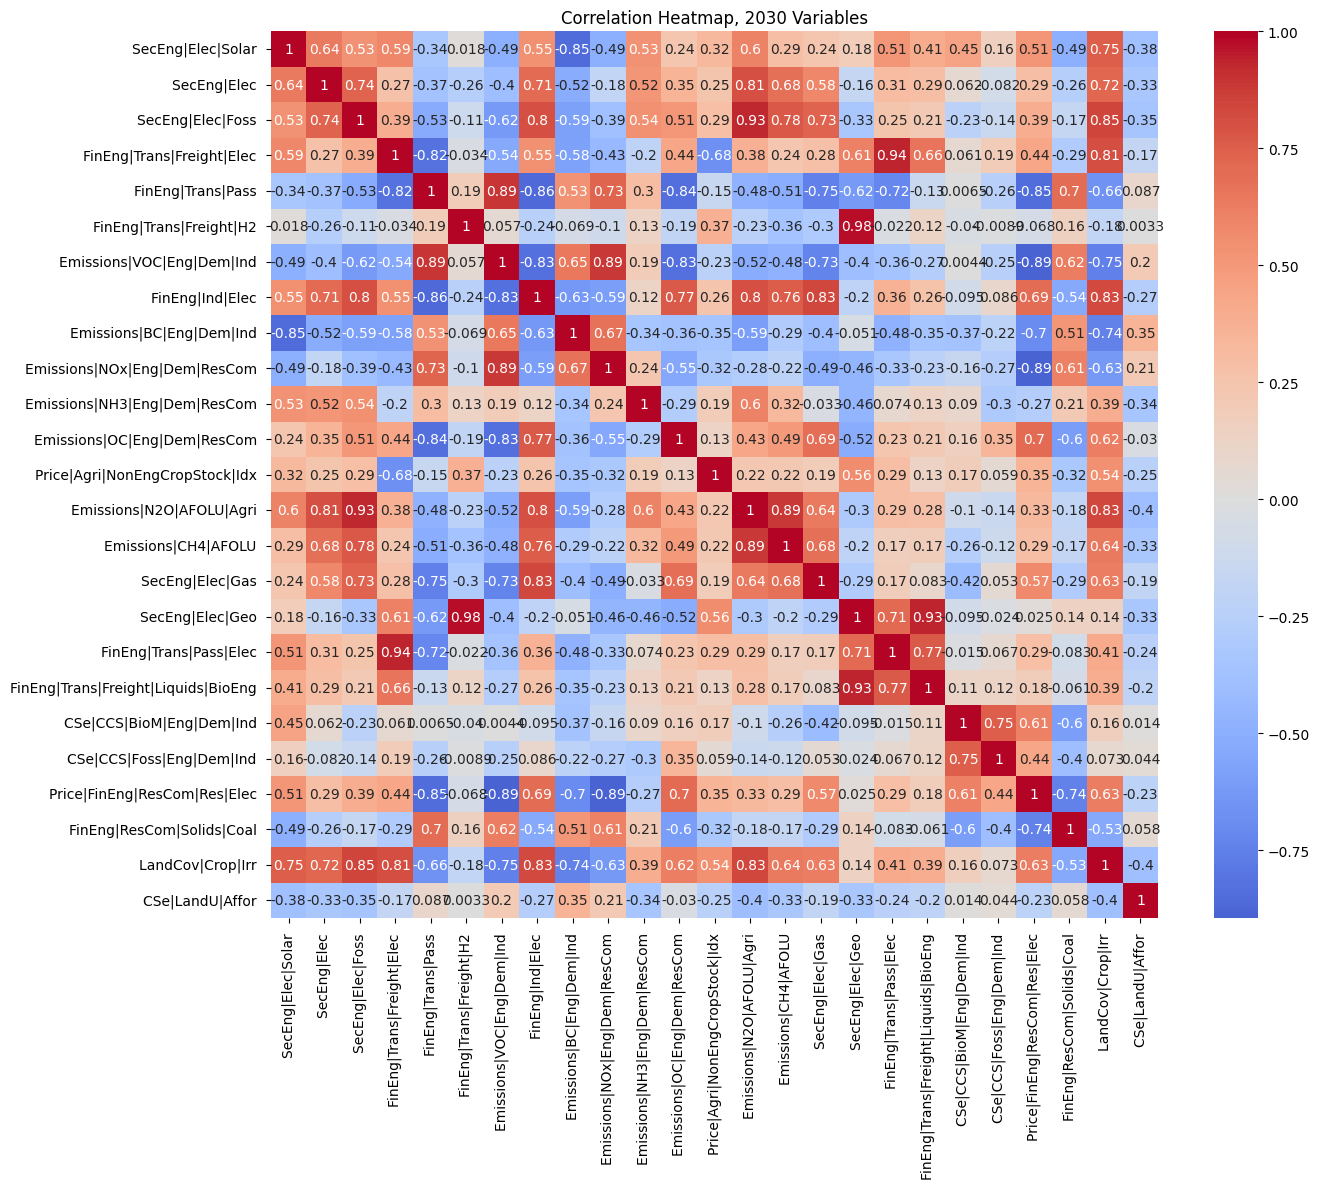

In [147]:
pu.data_exploration(df)

<Axes: xlabel='Category', ylabel='count'>

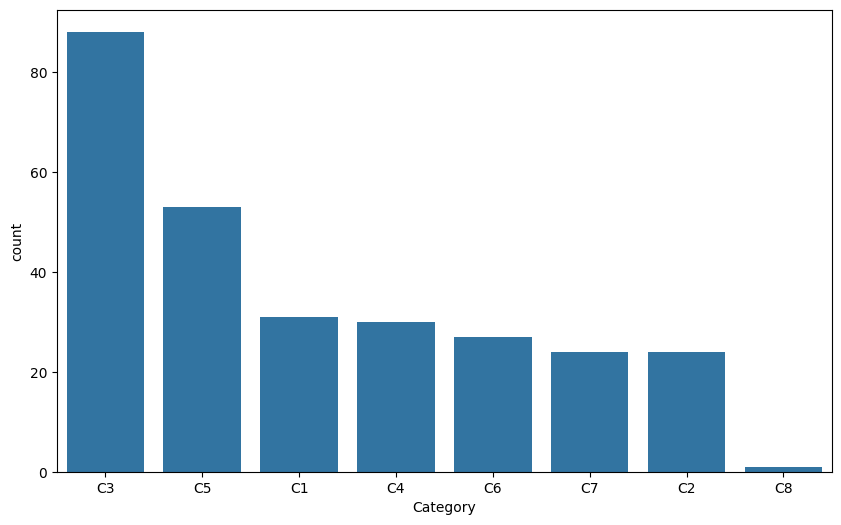

In [148]:
#plot the distribution of the categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)

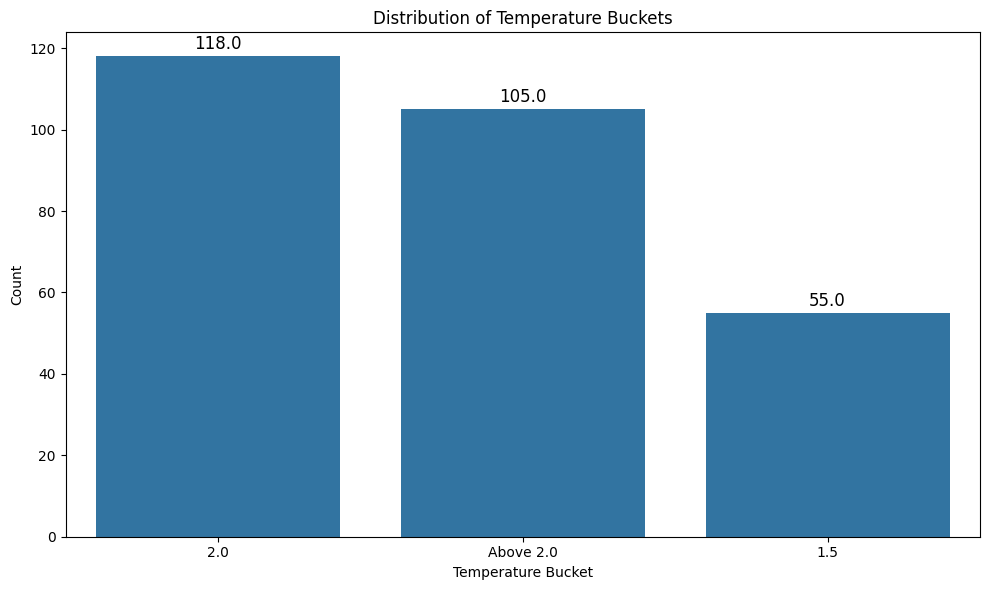

In [149]:
pu.plot_temp_buckets(df)


In [150]:
print("Transport DataFrame:")
print(transport_df.shape)

print("\nIndustry DataFrame:")
print(industry_df.shape)

print("\nResidential DataFrame:")
print(buildings_df.shape)

print("\nElectricity DataFrame:")
print(electricity_df.shape)

print("\nAFOLU DataFrame:")
print(agriculture_df.shape)

Transport DataFrame:
(278, 14)

Industry DataFrame:
(278, 14)

Residential DataFrame:
(278, 14)

Electricity DataFrame:
(278, 14)

AFOLU DataFrame:
(278, 14)


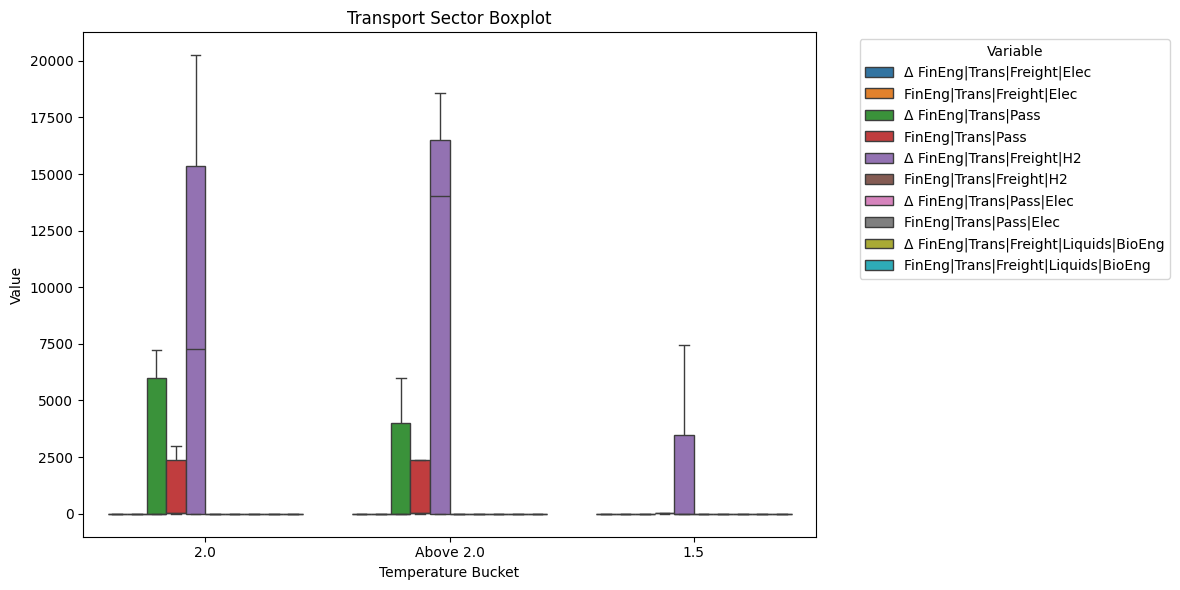

In [151]:
pu.plot_sector_boxplots(transport_df, "Transport")


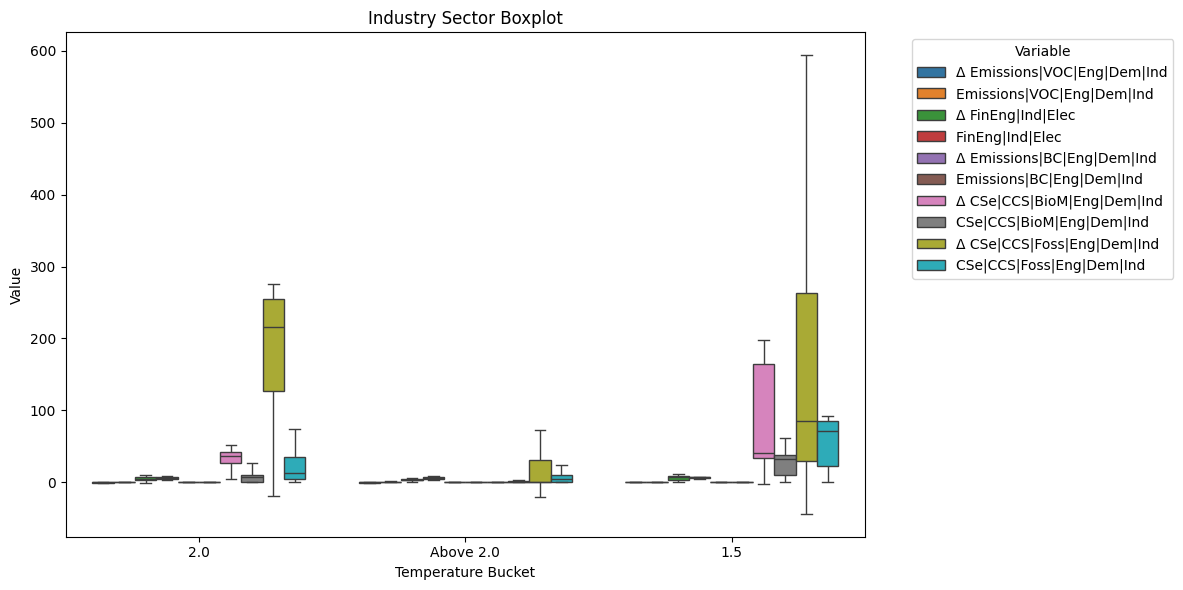

In [152]:
pu.plot_sector_boxplots(industry_df, "Industry")

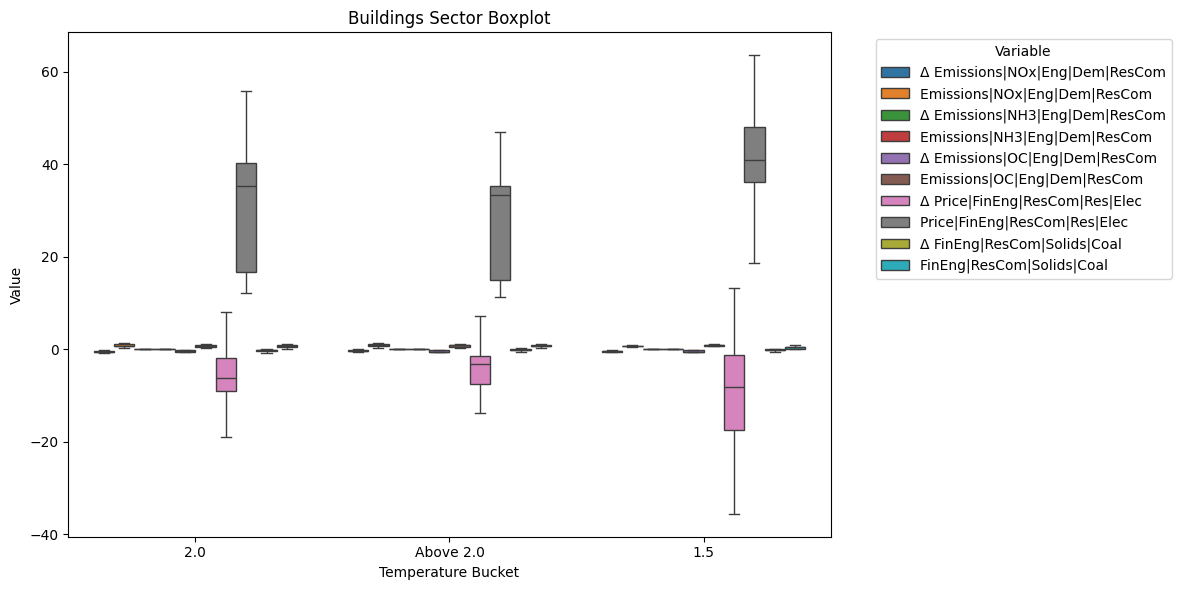

In [153]:
pu.plot_sector_boxplots(buildings_df, "Buildings")

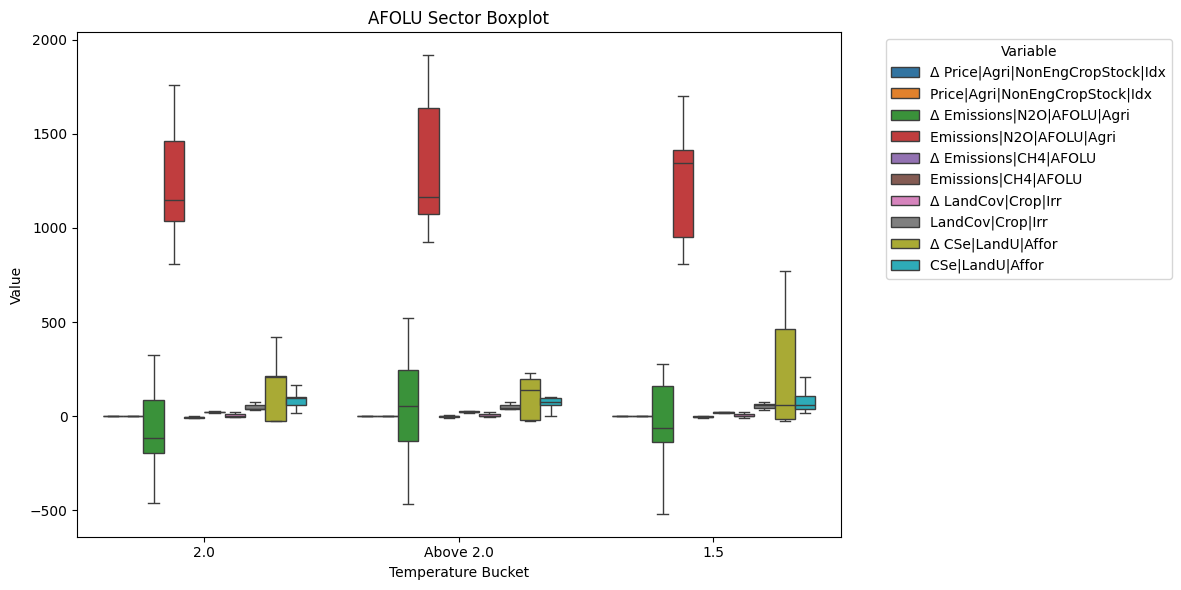

In [154]:
pu.plot_sector_boxplots(agriculture_df, "AFOLU")

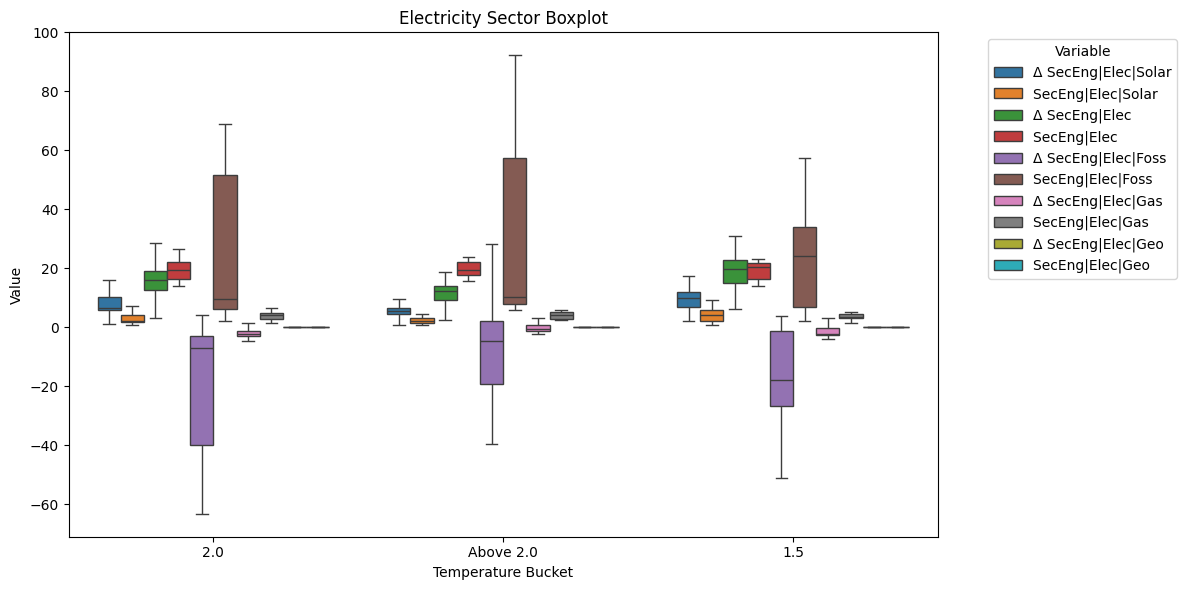

In [155]:
pu.plot_sector_boxplots(electricity_df, "Electricity")

_____

In [156]:
#at this point you can set the df you want to use for the rest of the analysis; commented out for use of whole df 

#df = agriculture_df

## Logistic Regression

In [157]:
X_train, X_test, y_train, y_test, model = pu.logistic_regression(df)

In [158]:
y_pred = model.predict(X_test)

In [159]:
pu.log_reg_report(y_test, y_pred)

Accuracy: 0.9880952380952381
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.98      1.00      0.99        53

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.99        84
weighted avg       0.99      0.99      0.99        84



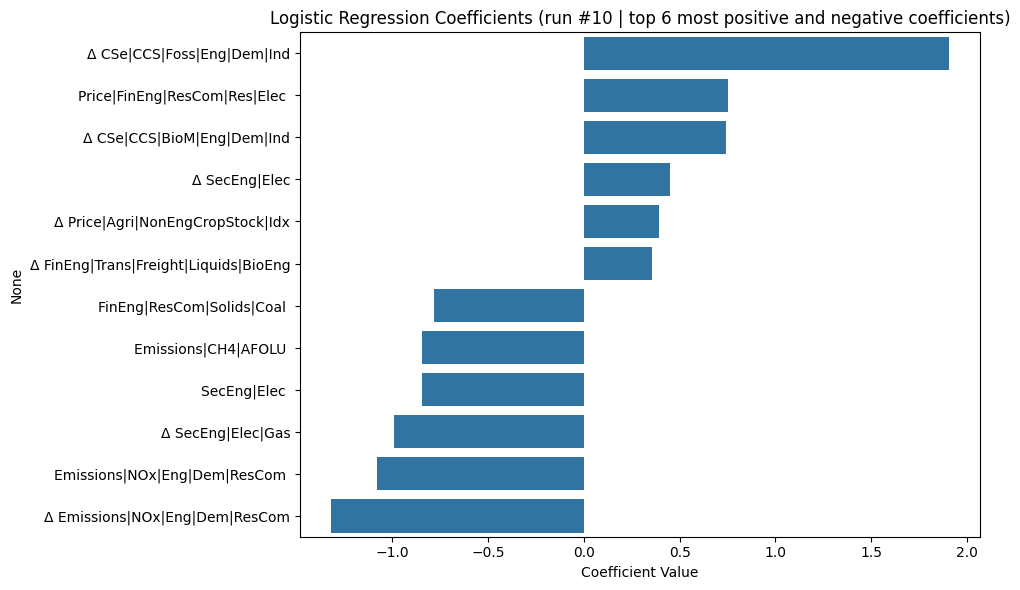

In [160]:
pu.visualize_log_reg(model, X_train, 'Logistic Regression Coefficients (run #10 | top 6 most positive and negative coefficients)', top_bottom_n=6)

____

## PRIM

In [161]:
X_scaled_15, y_15 = pu.get_x_and_Y(df, '1.5')
X_scaled_20, y_20 = pu.get_x_and_Y(df, '2.0')
X_scaled_above_20, y_above_20 = pu.get_x_and_Y(df, 'Above 2.0')

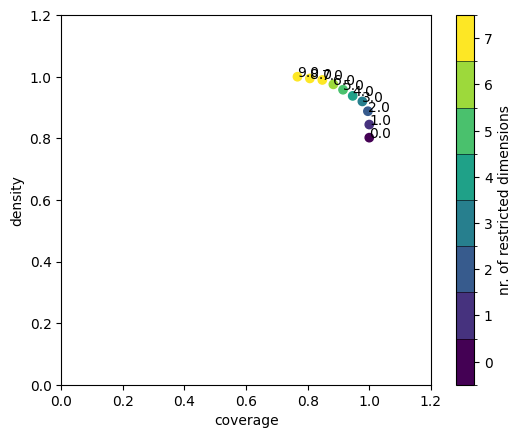

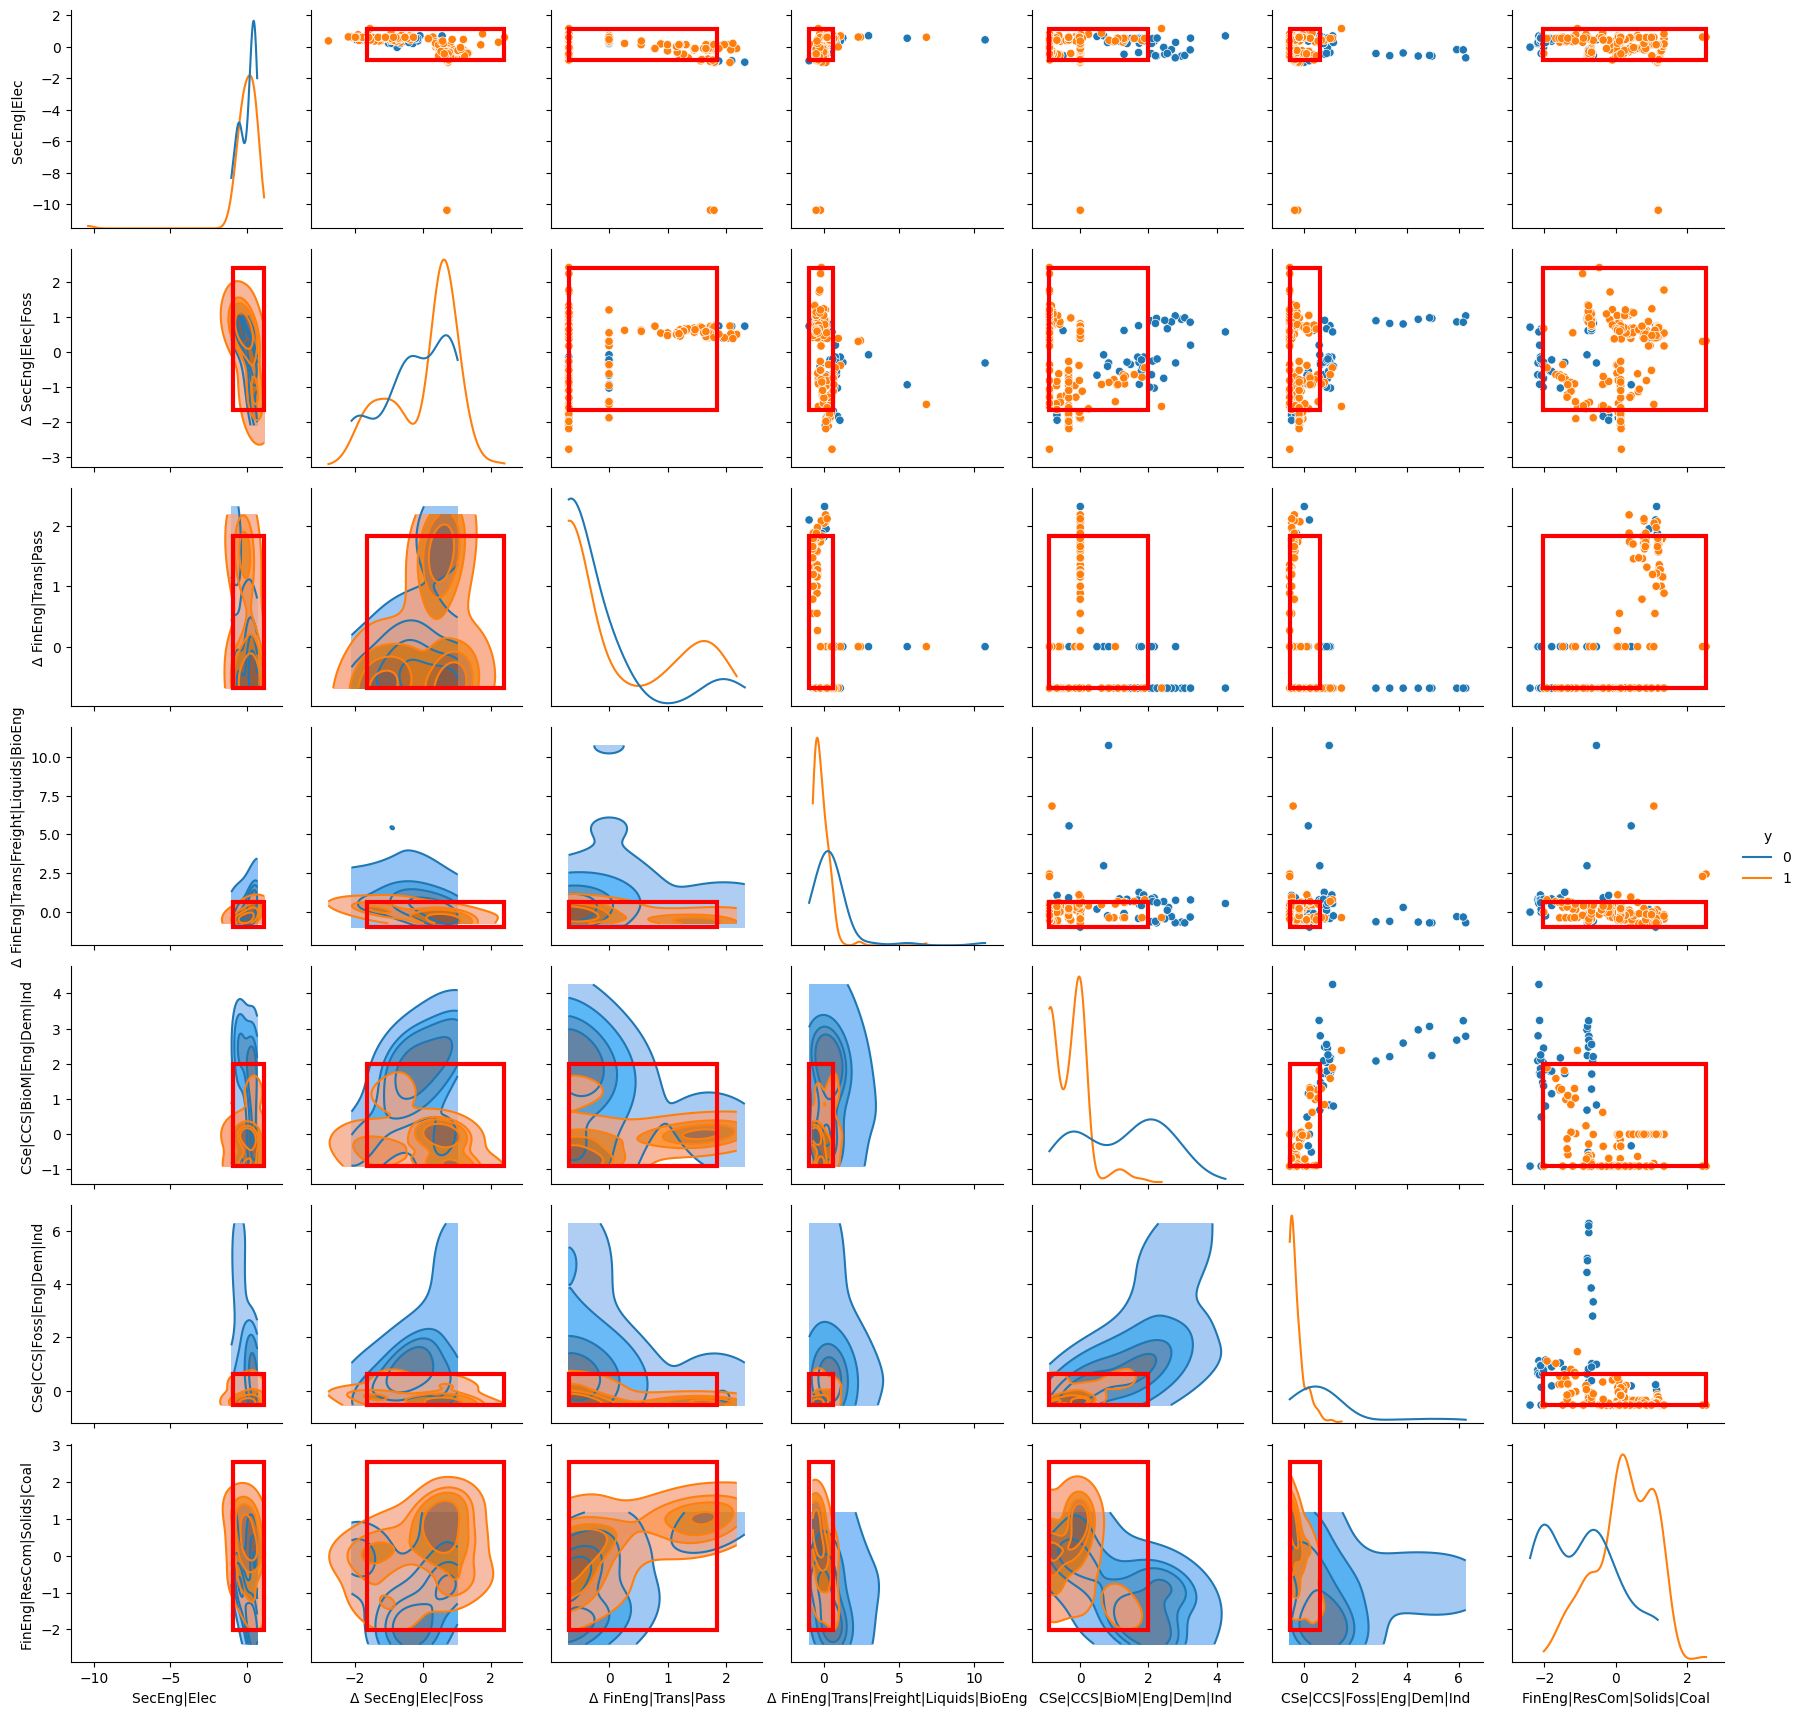

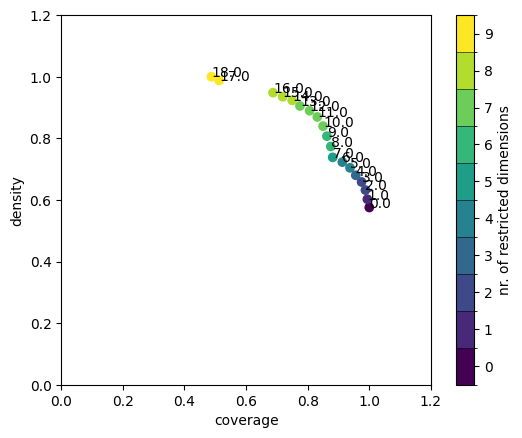

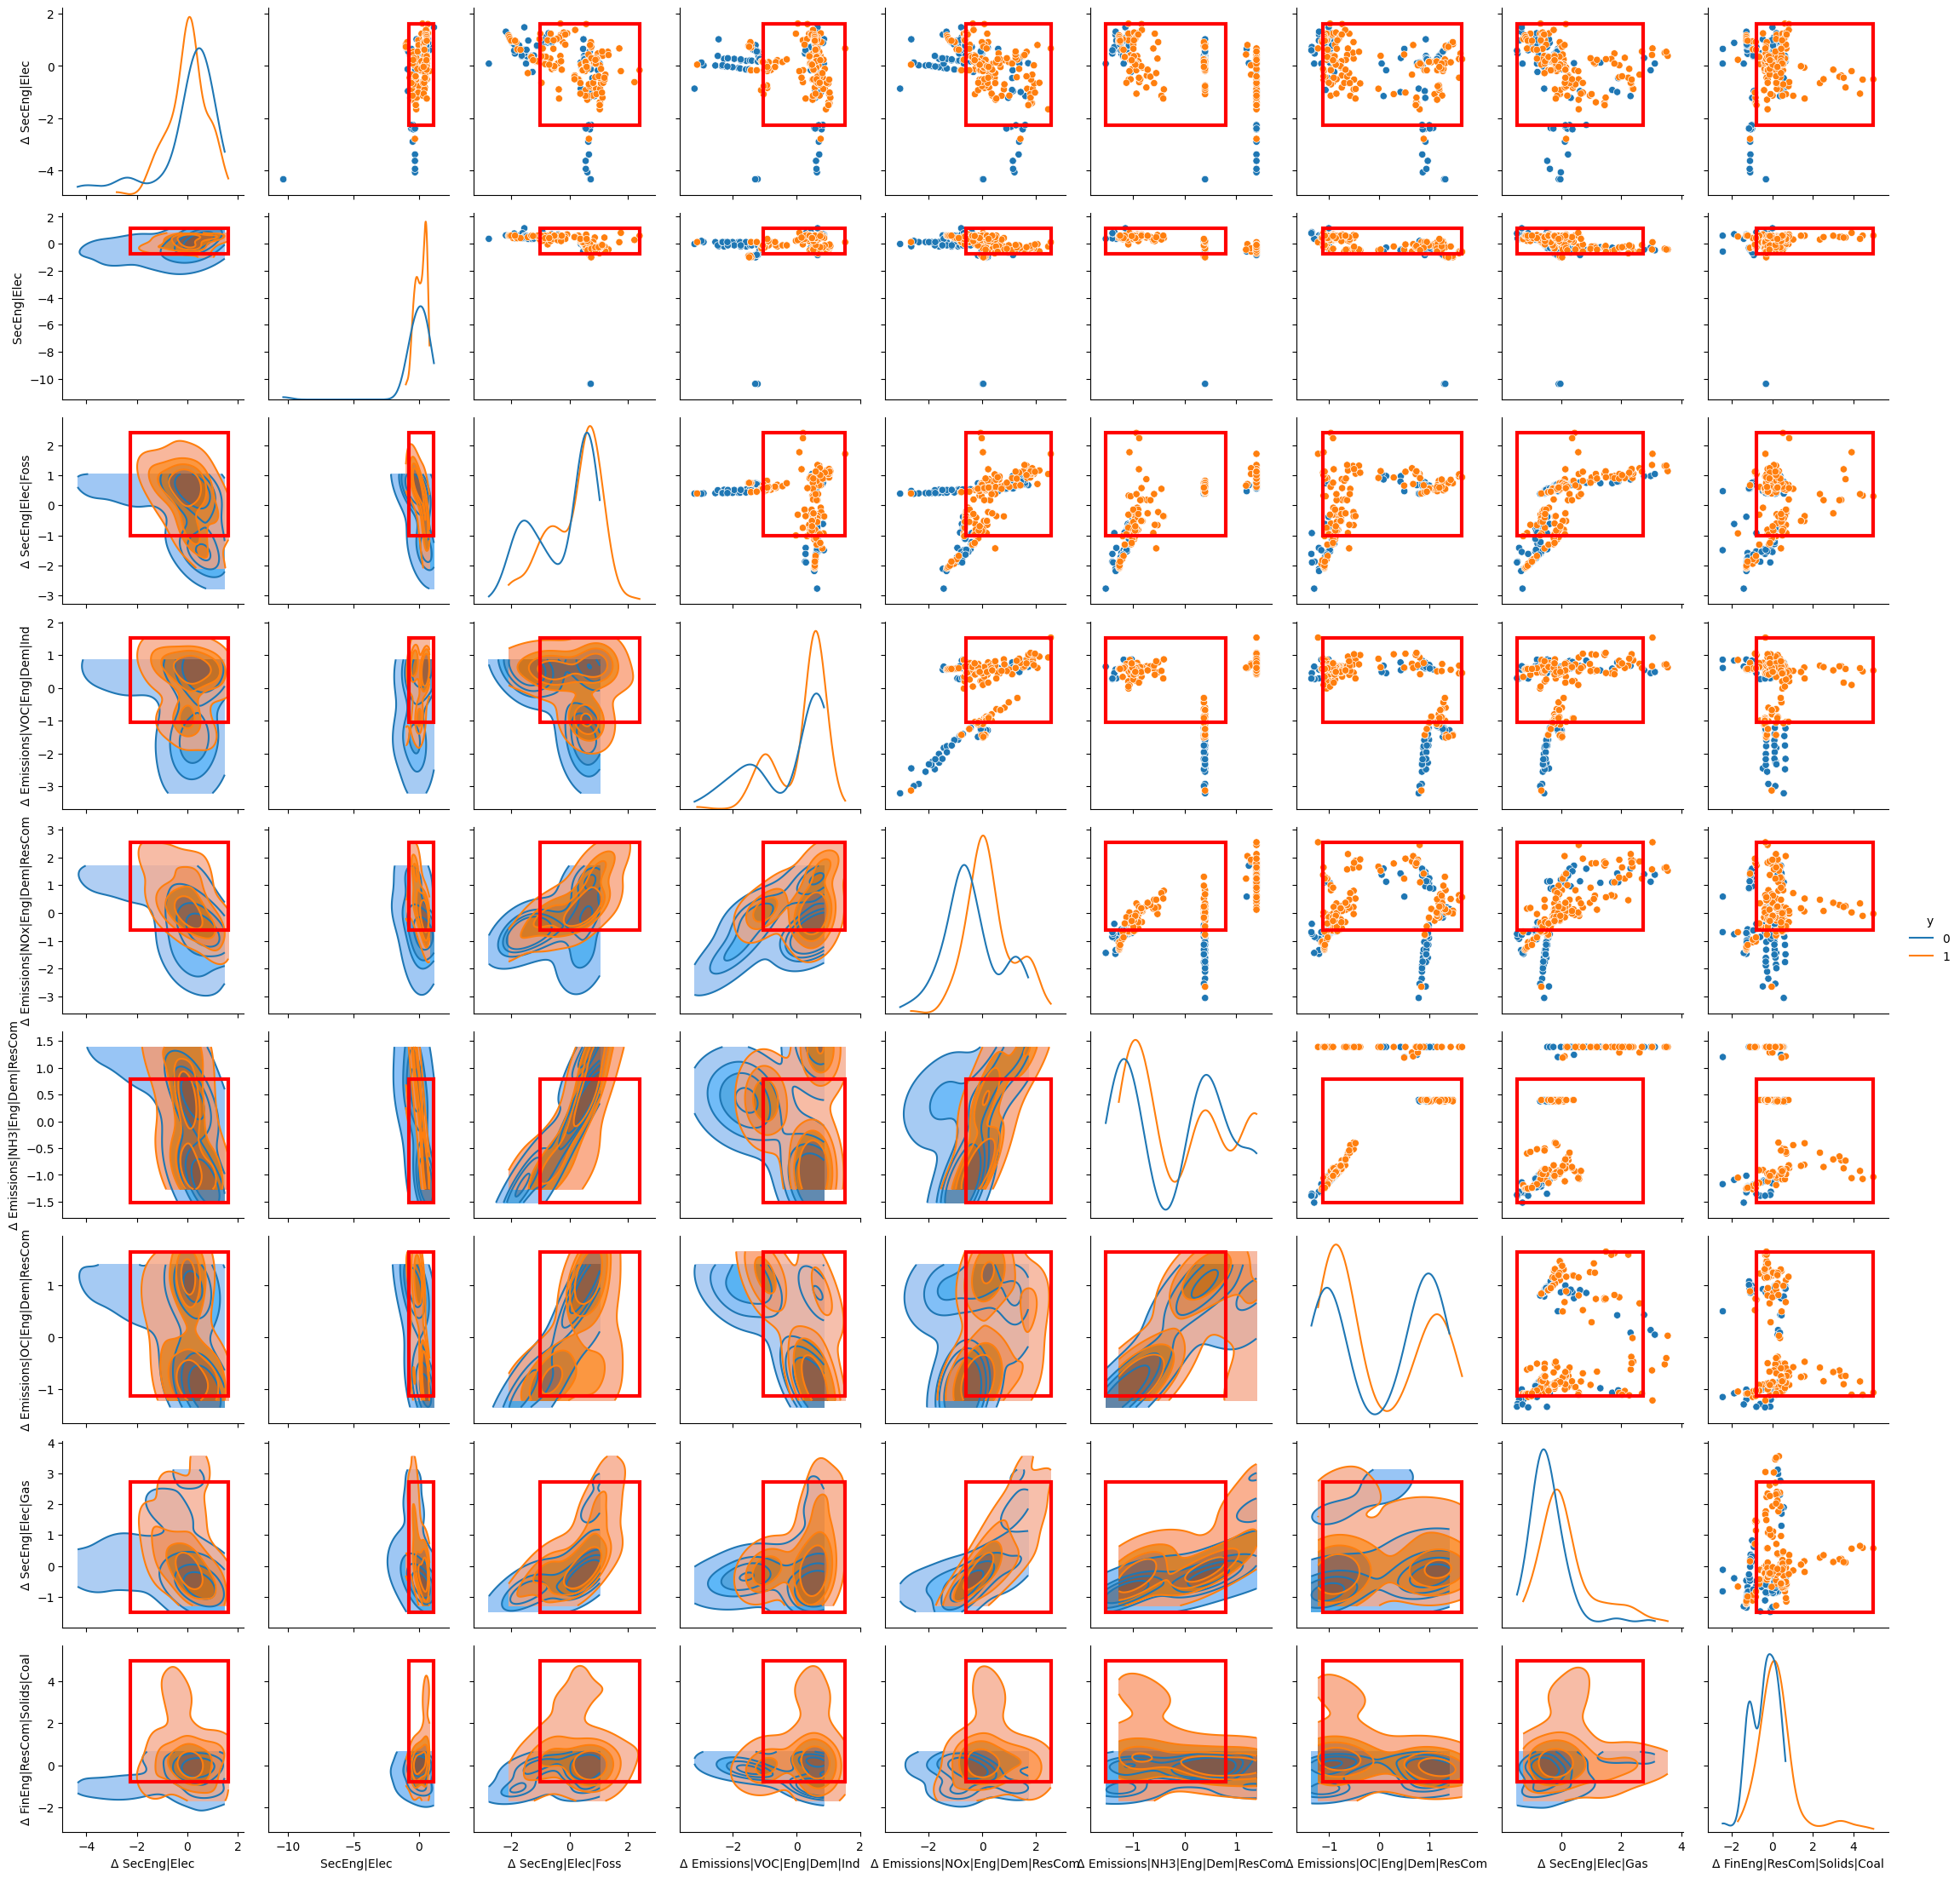

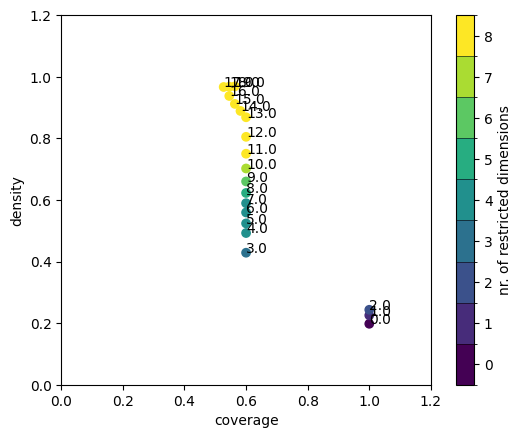

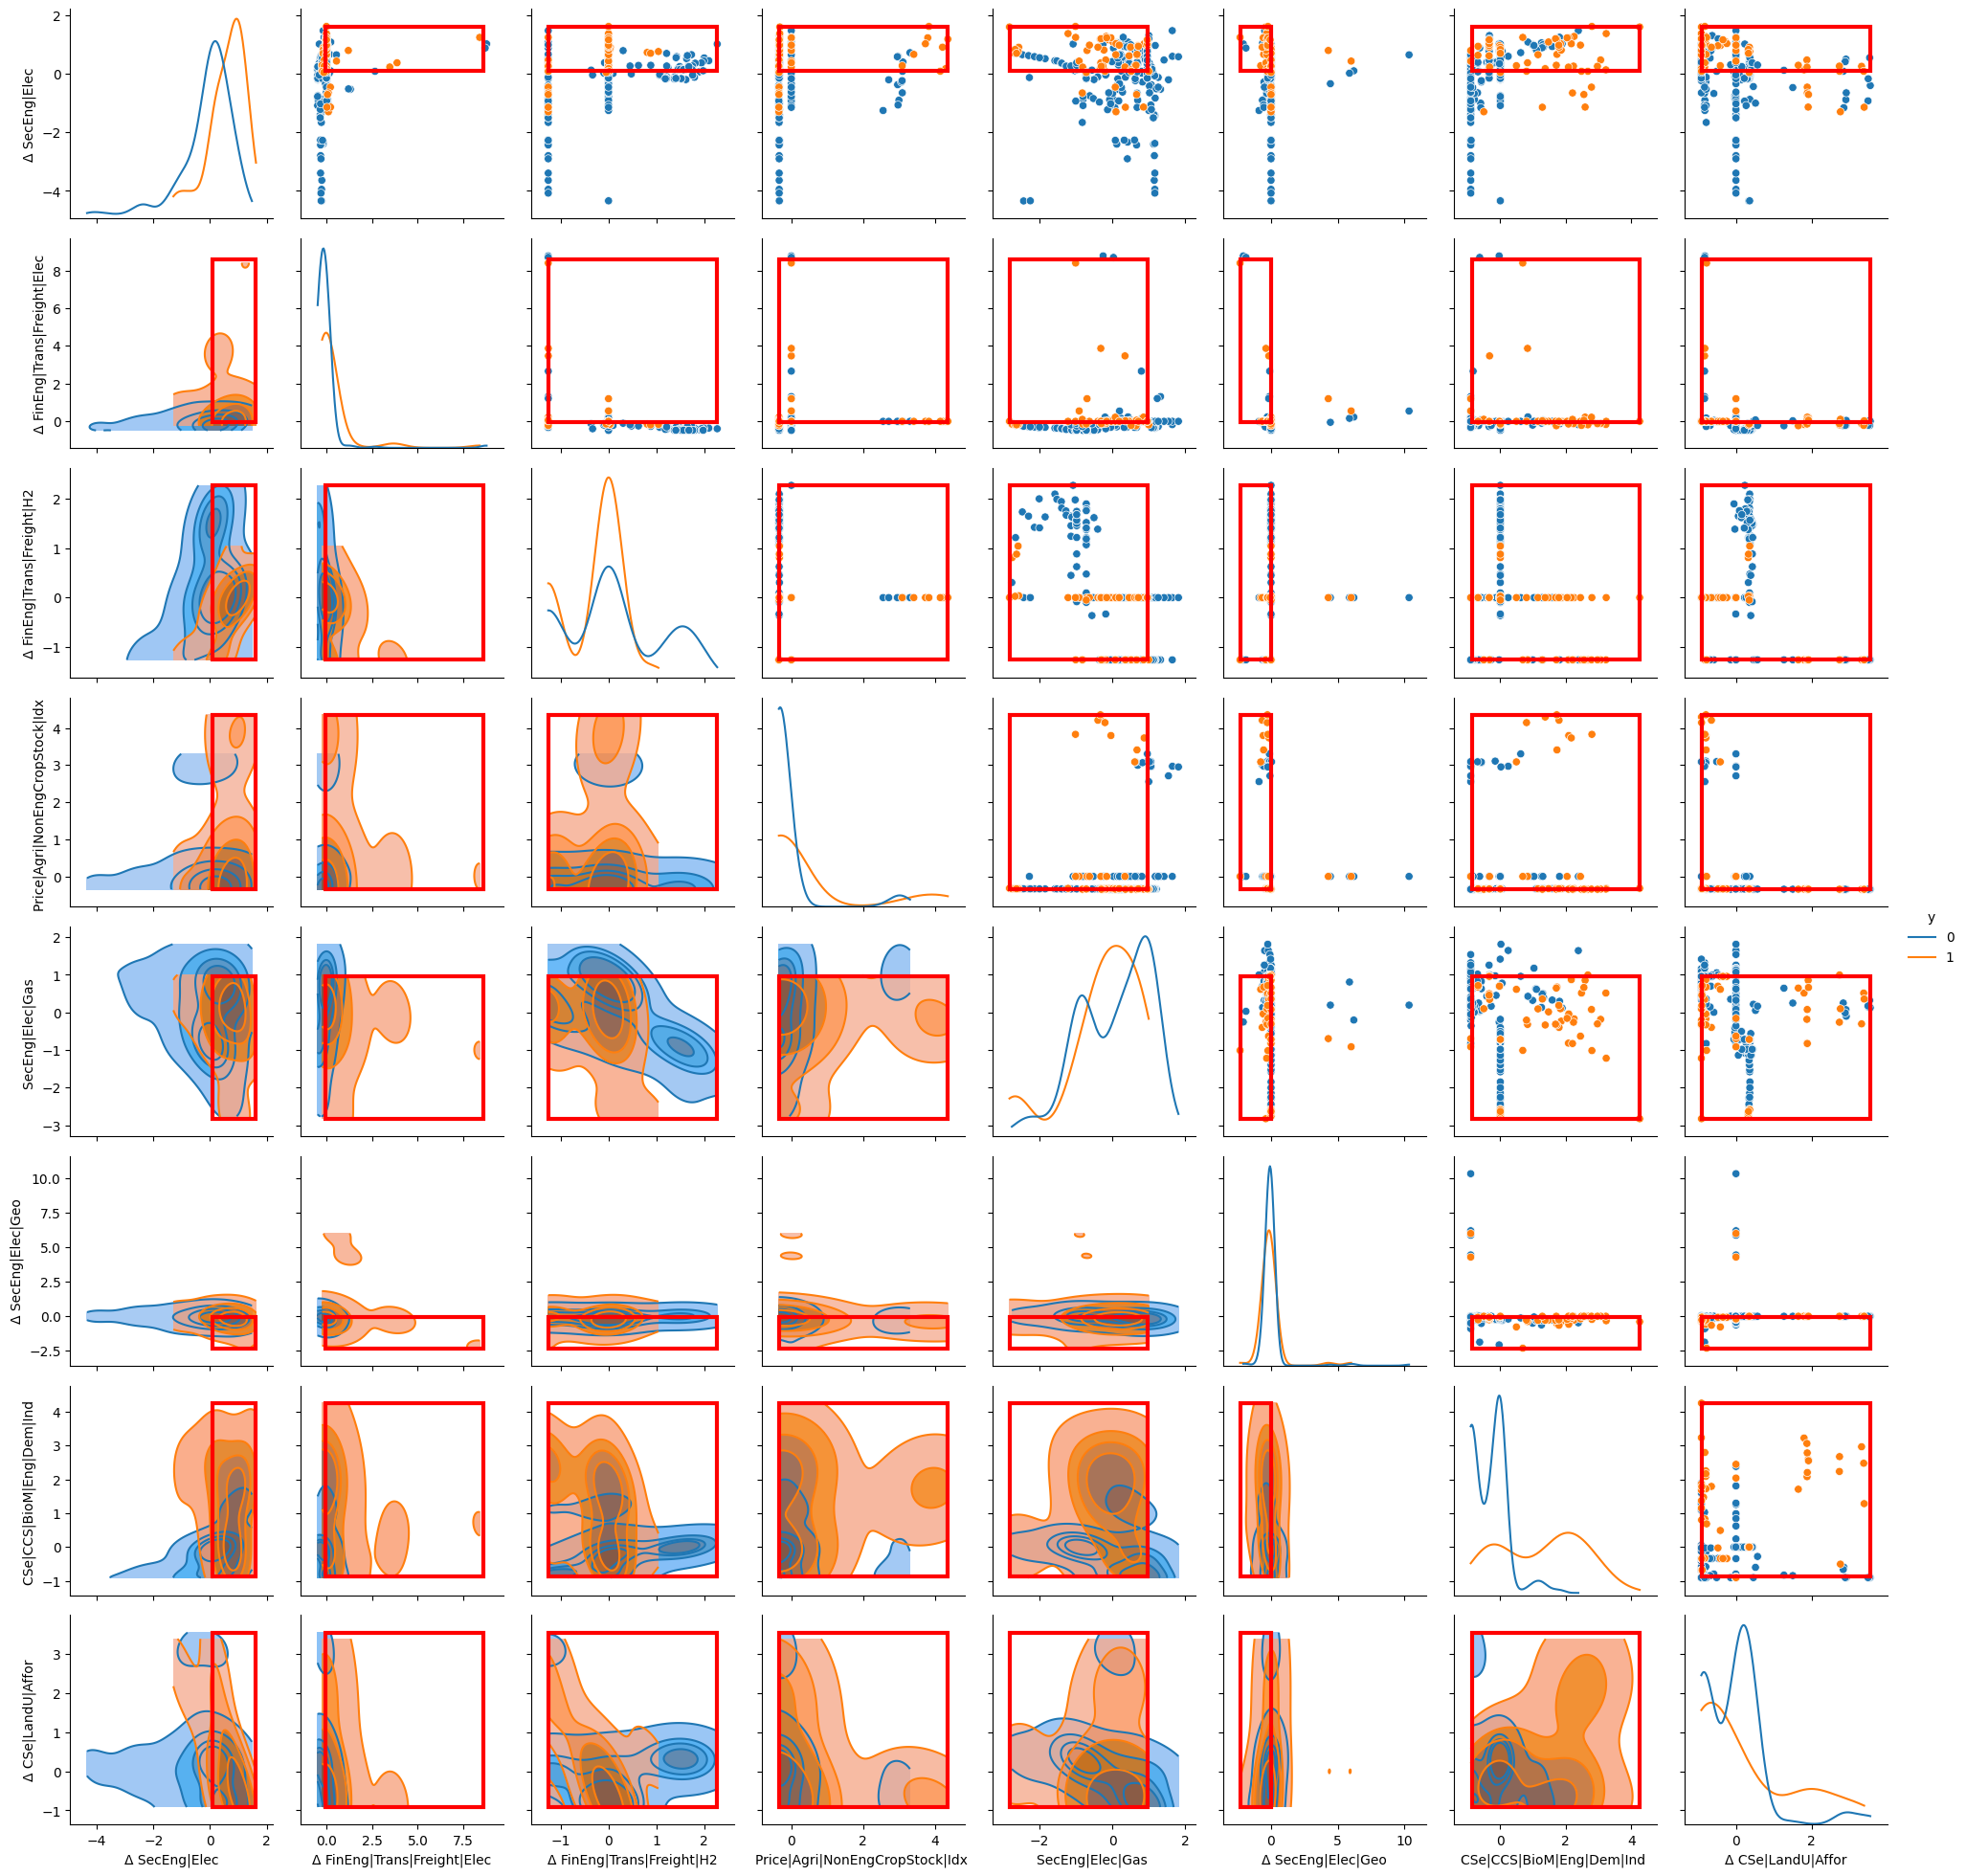

In [162]:
best_box_15, limits_15, all_boxes_15 = pu.prim_analysis(X_scaled_15, y_15)
best_box_20, limits_20, all_boxes_20 = pu.prim_analysis(X_scaled_20, y_20)
best_box_above_20, limits_above_20, all_boxes_above_20 = pu.prim_analysis(X_scaled_above_20, y_above_20)

In [163]:
limits_15

Δ SecEng|Elec|Solar  SecEng|Elec|Solar   Δ SecEng|Elec  SecEng|Elec   \
0            -3.249182           -1.907936      -4.344659     -0.860730   
1             1.839965            2.506937       1.624090      1.145859   

   Δ SecEng|Elec|Foss  SecEng|Elec|Foss   Δ FinEng|Trans|Freight|Elec  \
0           -1.637049          -1.854137                    -0.481920   
1            2.407210           1.707069                     8.773201   

   FinEng|Trans|Freight|Elec   Δ FinEng|Trans|Pass  FinEng|Trans|Pass   ...  \
0                   -0.664719            -0.685743           -0.700655  ...   
1                   10.840346             1.836882            2.146125  ...   

   Δ CSe|CCS|Foss|Eng|Dem|Ind  CSe|CCS|Foss|Eng|Dem|Ind   \
0                   -1.246863                  -0.541853   
1                    5.091393                   0.610711   

   Δ Price|FinEng|ResCom|Res|Elec  Price|FinEng|ResCom|Res|Elec   \
0                       -4.051482                      -1.647107   
1                        2.629555                       2.765627   

   Δ FinEng|ResCom|Solids|Coal  FinEng|ResCom|Solids|Coal   \
0                    -2.446799                   -2.023827   
1                     4.971278                    2.533137   

   Δ LandCov|Crop|Irr  LandCov|Crop|Irr   Δ CSe|LandU|Affor  CSe|LandU|Affor   
0           -3.284393          -1.409347          -0.915425         -1.615972  
1            2.679751           2.166928           3.548021          4.298992  

[2 rows x 50 columns]

In [164]:
results_15 = pu.assess(all_boxes_15)
results_15

box_index  precision (density)  recall (coverage)  f1_score  \
0          0                  1.0              0.767     0.868   

   restricted_dims   mass  
0                7  0.615

In [165]:
restricted_vars_15 = pu.get_restricted_variables(best_box_15, X_scaled_15)
restricted_vars_15

Variable 'SecEng|Elec ' is restricted to [-0.8607, 1.1459] (data range: [-10.3756, 1.1459])
Variable 'Δ SecEng|Elec|Foss' is restricted to [-1.6370, 2.4072] (data range: [-2.7675, 2.4072])
Variable 'Δ FinEng|Trans|Pass' is restricted to [-0.6857, 1.8369] (data range: [-0.6866, 2.3163])
Variable 'Δ FinEng|Trans|Freight|Liquids|BioEng' is restricted to [-0.9690, 0.6345] (data range: [-0.9690, 10.7311])
Variable 'CSe|CCS|BioM|Eng|Dem|Ind ' is restricted to [-0.9050, 1.9850] (data range: [-0.9050, 4.2575])
Variable 'CSe|CCS|Foss|Eng|Dem|Ind ' is restricted to [-0.5419, 0.6107] (data range: [-0.5419, 6.2736])
Variable 'FinEng|ResCom|Solids|Coal ' is restricted to [-2.0238, 2.5331] (data range: [-2.3969, 2.5331])


['SecEng|Elec ',
 'Δ SecEng|Elec|Foss',
 'Δ FinEng|Trans|Pass',
 'Δ FinEng|Trans|Freight|Liquids|BioEng',
 'CSe|CCS|BioM|Eng|Dem|Ind ',
 'CSe|CCS|Foss|Eng|Dem|Ind ',
 'FinEng|ResCom|Solids|Coal ']

In [166]:
important_vars = pu.rank_box_variables(limits_15, restricted_vars_15)

for _, row in important_vars.iterrows():
    print(f"{row['Variable']}: range width = {row['Box Range Width']:.3f}")


CSe|CCS|Foss|Eng|Dem|Ind : range width = 1.153
Δ FinEng|Trans|Freight|Liquids|BioEng: range width = 1.604
SecEng|Elec : range width = 2.007
Δ FinEng|Trans|Pass: range width = 2.523
CSe|CCS|BioM|Eng|Dem|Ind : range width = 2.890
Δ SecEng|Elec|Foss: range width = 4.044
FinEng|ResCom|Solids|Coal : range width = 4.557
Δ Emissions|CH4|AFOLU: range width = inf
Emissions|CH4|AFOLU : range width = inf
Δ SecEng|Elec|Gas: range width = inf
SecEng|Elec|Gas : range width = inf
Δ SecEng|Elec|Geo: range width = inf
SecEng|Elec|Geo : range width = inf
Δ FinEng|Trans|Pass|Elec: range width = inf
FinEng|Trans|Pass|Elec : range width = inf
Δ SecEng|Elec|Solar: range width = inf
Δ CSe|CCS|BioM|Eng|Dem|Ind: range width = inf
Emissions|N2O|AFOLU|Agri : range width = inf
Δ CSe|CCS|Foss|Eng|Dem|Ind: range width = inf
Δ Price|FinEng|ResCom|Res|Elec: range width = inf
Price|FinEng|ResCom|Res|Elec : range width = inf
Δ FinEng|ResCom|Solids|Coal: range width = inf
Δ LandCov|Crop|Irr: range width = inf
LandCov|Cr

In [167]:
limits_20

Δ SecEng|Elec|Solar  SecEng|Elec|Solar   Δ SecEng|Elec  SecEng|Elec   \
0            -3.249182           -1.907936      -2.268367     -0.755293   
1             1.839965            2.506937       1.624090      1.145859   

   Δ SecEng|Elec|Foss  SecEng|Elec|Foss   Δ FinEng|Trans|Freight|Elec  \
0           -1.011258          -1.854137                    -0.481920   
1            2.407210           1.707069                     8.773201   

   FinEng|Trans|Freight|Elec   Δ FinEng|Trans|Pass  FinEng|Trans|Pass   ...  \
0                   -0.664719            -0.686637           -0.700655  ...   
1                   10.840346             2.316309            2.146125  ...   

   Δ CSe|CCS|Foss|Eng|Dem|Ind  CSe|CCS|Foss|Eng|Dem|Ind   \
0                   -1.246863                  -0.541853   
1                    5.091393                   6.273642   

   Δ Price|FinEng|ResCom|Res|Elec  Price|FinEng|ResCom|Res|Elec   \
0                       -4.051482                      -1.647107   
1                        2.629555                       2.765627   

   Δ FinEng|ResCom|Solids|Coal  FinEng|ResCom|Solids|Coal   \
0                    -0.793664                   -2.396854   
1                     4.971278                    2.533137   

   Δ LandCov|Crop|Irr  LandCov|Crop|Irr   Δ CSe|LandU|Affor  CSe|LandU|Affor   
0           -3.284393          -1.409347          -0.915425         -1.615972  
1            2.679751           2.166928           3.548021          4.298992  

[2 rows x 50 columns]

In [168]:
results_20 = pu.assess(all_boxes_20)
results_20

box_index  precision (density)  recall (coverage)  f1_score  \
0          0                  1.0              0.488     0.655   

   restricted_dims   mass  
0                9  0.281

In [169]:
restricted_vars_20 = pu.get_restricted_variables(best_box_20, X_scaled_20)

Variable 'Δ SecEng|Elec' is restricted to [-2.2684, 1.6241] (data range: [-4.3447, 1.6241])
Variable 'SecEng|Elec ' is restricted to [-0.7553, 1.1459] (data range: [-10.3756, 1.1459])
Variable 'Δ SecEng|Elec|Foss' is restricted to [-1.0113, 2.4072] (data range: [-2.7675, 2.4072])
Variable 'Δ Emissions|VOC|Eng|Dem|Ind' is restricted to [-1.0478, 1.5321] (data range: [-3.2101, 1.5321])
Variable 'Δ Emissions|NOx|Eng|Dem|ResCom' is restricted to [-0.6223, 2.5446] (data range: [-3.0507, 2.5446])
Variable 'Δ Emissions|NH3|Eng|Dem|ResCom' is restricted to [-1.5184, 0.7927] (data range: [-1.5184, 1.3885])
Variable 'Δ Emissions|OC|Eng|Dem|ResCom' is restricted to [-1.1291, 1.6479] (data range: [-1.3542, 1.6479])
Variable 'Δ SecEng|Elec|Gas' is restricted to [-1.4937, 2.7262] (data range: [-1.4937, 3.5513])
Variable 'Δ FinEng|ResCom|Solids|Coal' is restricted to [-0.7937, 4.9713] (data range: [-2.4468, 4.9713])


In [170]:
important_vars = pu.rank_box_variables(limits_20, restricted_vars_20)
for _, row in important_vars.iterrows():
    print(f"{row['Variable']}: range width = {row['Box Range Width']:.3f}")


SecEng|Elec : range width = 1.901
Δ Emissions|NH3|Eng|Dem|ResCom: range width = 2.311
Δ Emissions|VOC|Eng|Dem|Ind: range width = 2.580
Δ Emissions|OC|Eng|Dem|ResCom: range width = 2.777
Δ Emissions|NOx|Eng|Dem|ResCom: range width = 3.167
Δ SecEng|Elec|Foss: range width = 3.418
Δ SecEng|Elec: range width = 3.892
Δ SecEng|Elec|Gas: range width = 4.220
Δ FinEng|ResCom|Solids|Coal: range width = 5.765
Δ SecEng|Elec|Solar: range width = inf
SecEng|Elec|Gas : range width = inf
Δ SecEng|Elec|Geo: range width = inf
SecEng|Elec|Geo : range width = inf
Δ FinEng|Trans|Pass|Elec: range width = inf
FinEng|Trans|Pass|Elec : range width = inf
Δ FinEng|Trans|Freight|Liquids|BioEng: range width = inf
CSe|CCS|BioM|Eng|Dem|Ind : range width = inf
Δ CSe|CCS|BioM|Eng|Dem|Ind: range width = inf
Emissions|CH4|AFOLU : range width = inf
Δ CSe|CCS|Foss|Eng|Dem|Ind: range width = inf
CSe|CCS|Foss|Eng|Dem|Ind : range width = inf
Δ Price|FinEng|ResCom|Res|Elec: range width = inf
Price|FinEng|ResCom|Res|Elec : rang

In [171]:
limits_above_20

Δ SecEng|Elec|Solar  SecEng|Elec|Solar   Δ SecEng|Elec  SecEng|Elec   \
0            -3.249182           -1.907936       0.090539    -10.375629   
1             1.839965            2.506937       1.624090      1.145859   

   Δ SecEng|Elec|Foss  SecEng|Elec|Foss   Δ FinEng|Trans|Freight|Elec  \
0           -2.767506          -1.854137                    -0.048088   
1            2.407210           1.707069                     8.583654   

   FinEng|Trans|Freight|Elec   Δ FinEng|Trans|Pass  FinEng|Trans|Pass   ...  \
0                   -0.664719            -0.686637           -0.700655  ...   
1                   10.840346             2.316309            2.146125  ...   

   Δ CSe|CCS|Foss|Eng|Dem|Ind  CSe|CCS|Foss|Eng|Dem|Ind   \
0                   -1.246863                  -0.541853   
1                    5.091393                   6.273642   

   Δ Price|FinEng|ResCom|Res|Elec  Price|FinEng|ResCom|Res|Elec   \
0                       -4.051482                      -1.647107   
1                        2.629555                       2.765627   

   Δ FinEng|ResCom|Solids|Coal  FinEng|ResCom|Solids|Coal   \
0                    -2.446799                   -2.396854   
1                     4.971278                    2.533137   

   Δ LandCov|Crop|Irr  LandCov|Crop|Irr   Δ CSe|LandU|Affor  CSe|LandU|Affor   
0           -3.284393          -1.409347          -0.913863         -1.615972  
1            2.679751           2.166928           3.548021          4.298992  

[2 rows x 50 columns]

In [172]:
results_above_20 = pu.assess(all_boxes_above_20)
results_above_20

box_index  precision (density)  recall (coverage)  f1_score  \
0          0                0.969              0.564     0.713   

   restricted_dims   mass  
0                8  0.115

In [173]:
restricted_vars_above_20 = pu.get_restricted_variables(best_box_above_20, X_scaled_above_20)

Variable 'Δ SecEng|Elec' is restricted to [0.0905, 1.6241] (data range: [-4.3447, 1.6241])
Variable 'Δ FinEng|Trans|Freight|Elec' is restricted to [-0.0481, 8.5837] (data range: [-0.4819, 8.7732])
Variable 'Δ FinEng|Trans|Freight|H2' is restricted to [-1.2588, 2.2699] (data range: [-1.2588, 2.2699])
Variable 'Price|Agri|NonEngCropStock|Idx ' is restricted to [-0.3383, 4.3565] (data range: [-0.3467, 4.3565])
Variable 'SecEng|Elec|Gas ' is restricted to [-2.8272, 0.9574] (data range: [-2.8272, 1.8111])
Variable 'Δ SecEng|Elec|Geo' is restricted to [-2.3175, -0.0262] (data range: [-2.3175, 10.3365])
Variable 'CSe|CCS|BioM|Eng|Dem|Ind ' is restricted to [-0.8675, 4.2575] (data range: [-0.9050, 4.2575])
Variable 'Δ CSe|LandU|Affor' is restricted to [-0.9139, 3.5480] (data range: [-0.9154, 3.5480])


In [174]:
important_vars = pu.rank_box_variables(limits_above_20, restricted_vars_above_20)
for _, row in important_vars.iterrows():
    print(f"{row['Variable']}: range width = {row['Box Range Width']:.3f}")


Δ SecEng|Elec: range width = 1.534
Δ SecEng|Elec|Geo: range width = 2.291
Δ FinEng|Trans|Freight|H2: range width = 3.529
SecEng|Elec|Gas : range width = 3.785
Δ CSe|LandU|Affor: range width = 4.462
Price|Agri|NonEngCropStock|Idx : range width = 4.695
CSe|CCS|BioM|Eng|Dem|Ind : range width = 5.125
Δ FinEng|Trans|Freight|Elec: range width = 8.632
Δ SecEng|Elec|Solar: range width = inf
Δ Emissions|CH4|AFOLU: range width = inf
Emissions|CH4|AFOLU : range width = inf
Δ SecEng|Elec|Gas: range width = inf
SecEng|Elec|Geo : range width = inf
Δ FinEng|Trans|Pass|Elec: range width = inf
FinEng|Trans|Pass|Elec : range width = inf
Δ CSe|CCS|BioM|Eng|Dem|Ind: range width = inf
FinEng|Trans|Freight|Liquids|BioEng : range width = inf
Δ CSe|CCS|Foss|Eng|Dem|Ind: range width = inf
CSe|CCS|Foss|Eng|Dem|Ind : range width = inf
Δ Price|FinEng|ResCom|Res|Elec: range width = inf
Price|FinEng|ResCom|Res|Elec : range width = inf
Δ FinEng|ResCom|Solids|Coal: range width = inf
FinEng|ResCom|Solids|Coal : range 

_____

# SHAP

In [175]:
model, coefs = pu.log_reg_simple(X_scaled_15, y_15)

In [176]:
shap_importance = pu.shap_analysis(X_scaled_15, y_15)

F1 Score: 0.9583333333333334
Accuracy: 0.9285714285714286
17 variables account for 80% of total SHAP importance.


/opt/anaconda3/envs/prim/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:18:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [177]:
# Get PRIM box ranking
prim_df = pu.rank_box_variables(limits_15, restricted_vars_15)

# Merge all
combined = prim_df.merge(coefs, on="Variable", how="outer")
combined = combined.merge(shap_importance, on="Variable", how="outer")

# Sort by any column you like
combined_sorted = combined.sort_values("SHAP Importance")  # or SHAP Importance
combined_sorted


Variable  Box Range Width  LogReg Coef  \
0               CSe|CCS|BioM|Eng|Dem|Ind          2.890086    -0.525191   
20                           SecEng|Elec          2.006588     0.116484   
19          Price|FinEng|ResCom|Res|Elec               inf    -0.556837   
33          Δ Emissions|OC|Eng|Dem|ResCom              inf    -0.082627   
35                      Δ FinEng|Ind|Elec              inf    -0.455156   
13               FinEng|Trans|Freight|H2               inf    -0.842679   
9              Emissions|VOC|Eng|Dem|Ind               inf     0.336258   
8            Emissions|OC|Eng|Dem|ResCom               inf    -0.106609   
36            Δ FinEng|ResCom|Solids|Coal              inf     0.139744   
3               Emissions|BC|Eng|Dem|Ind               inf     0.374751   
31         Δ Emissions|NH3|Eng|Dem|ResCom              inf    -0.202729   
15                     FinEng|Trans|Pass               inf     0.141560   
38              Δ FinEng|Trans|Freight|H2              inf    -0.202728   
2                        CSe|LandU|Affor               inf    -0.528548   
23                       SecEng|Elec|Geo               inf     0.089541   
46                     Δ SecEng|Elec|Foss         4.044259     0.201996   
5               Emissions|N2O|AFOLU|Agri               inf    -0.367463   
47                      Δ SecEng|Elec|Gas              inf     0.327781   
42                     Δ LandCov|Crop|Irr              inf    -0.391899   
10                       FinEng|Ind|Elec               inf     0.574322   
12             FinEng|Trans|Freight|Elec               inf    -0.073481   
16                FinEng|Trans|Pass|Elec               inf     0.023017   
17                      LandCov|Crop|Irr               inf    -0.718771   
24                     SecEng|Elec|Solar               inf     0.061002   
28             Δ Emissions|BC|Eng|Dem|Ind              inf     0.027195   
44         Δ Price|FinEng|ResCom|Res|Elec              inf    -0.195493   
32         Δ Emissions|NOx|Eng|Dem|ResCom              inf     0.745282   
14   FinEng|Trans|Freight|Liquids|BioEng               inf     0.200244   
21                      SecEng|Elec|Foss               inf     0.433805   
6           Emissions|NH3|Eng|Dem|ResCom               inf     0.469002   
18        Price|Agri|NonEngCropStock|Idx               inf    -0.222578   
26             Δ CSe|CCS|Foss|Eng|Dem|Ind              inf     0.048266   
27                      Δ CSe|LandU|Affor              inf    -0.198074   
4                    Emissions|CH4|AFOLU               inf     0.123448   
34            Δ Emissions|VOC|Eng|Dem|Ind              inf     0.513847   
22                       SecEng|Elec|Gas               inf     1.498075   
11             FinEng|ResCom|Solids|Coal          4.556965     0.720376   
41               Δ FinEng|Trans|Pass|Elec              inf    -0.158729   
29                  Δ Emissions|CH4|AFOLU              inf     1.109202   
45                          Δ SecEng|Elec              inf    -0.528415   
40                    Δ FinEng|Trans|Pass         2.522625     0.174929   
39  Δ FinEng|Trans|Freight|Liquids|BioEng         1.603511    -1.180234   
48                      Δ SecEng|Elec|Geo              inf    -0.086561   
30             Δ Emissions|N2O|AFOLU|Agri              inf     0.792586   
49                    Δ SecEng|Elec|Solar              inf    -0.108240   
37            Δ FinEng|Trans|Freight|Elec              inf    -0.026253   
43       Δ Price|Agri|NonEngCropStock|Idx              inf     0.170757   
7           Emissions|NOx|Eng|Dem|ResCom               inf     1.211039   
25             Δ CSe|CCS|BioM|Eng|Dem|Ind              inf    -1.160381   
1               CSe|CCS|Foss|Eng|Dem|Ind          1.152563    -0.820314   

    SHAP Importance  
0          0.000000  
20         0.000000  
19         0.000000  
33         0.000000  
35         0.000000  
13         0.000000  
9          0.000000  
8          0.000000  
36       

In [178]:
combined_sorted.query("`Box Range Width` < 3 and `SHAP Importance` > 0.2")

Variable  Box Range Width  LogReg Coef  \
40                    Δ FinEng|Trans|Pass         2.522625     0.174929   
39  Δ FinEng|Trans|Freight|Liquids|BioEng         1.603511    -1.180234   
1               CSe|CCS|Foss|Eng|Dem|Ind          1.152563    -0.820314   

    SHAP Importance  
40         0.367190  
39         0.376247  
1          1.462875

In [179]:
os.chdir('/Users/georgiaray_ic/Documents/coding/PRIM/attempt_2')
importlib.reload(pu)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/georgiaray_ic/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/georgiaray_ic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<module 'prim_utils' from '/Users/georgiaray_ic/Documents/coding/PRIM/attempt_2/prim_utils.py'>

In [180]:
query_15 = pu.whole_shap_query(X_scaled_15, y_15, limits_15, restricted_vars_15)
query_15

/opt/anaconda3/envs/prim/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:18:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1 Score: 0.9583333333333334
Accuracy: 0.9285714285714286
17 variables account for 80% of total SHAP importance.


/opt/anaconda3/envs/prim/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Empty DataFrame
Columns: [Variable, Box Range Width, LogReg Coef, SHAP Importance]
Index: []

In [181]:
query_20 = pu.whole_shap_query(X_scaled_20, y_20, limits_20, restricted_vars_20)
query_20

/opt/anaconda3/envs/prim/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:18:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1 Score: 0.9195402298850575
Accuracy: 0.9166666666666666
19 variables account for 80% of total SHAP importance.


/opt/anaconda3/envs/prim/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Empty DataFrame
Columns: [Variable, Box Range Width, LogReg Coef, SHAP Importance]
Index: []

In [182]:
query_above_20 = pu.whole_shap_query(X_scaled_above_20, y_above_20, limits_above_20, restricted_vars_above_20)
query_above_20

/opt/anaconda3/envs/prim/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:18:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1 Score: 0.75
Accuracy: 0.9285714285714286
17 variables account for 80% of total SHAP importance.


/opt/anaconda3/envs/prim/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Empty DataFrame
Columns: [Variable, Box Range Width, LogReg Coef, SHAP Importance]
Index: []

_____

# Clustering

In [183]:
os.chdir('/Users/georgiaray_ic/Documents/coding/PRIM/attempt_2')
importlib.reload(pu)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/georgiaray_ic/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/georgiaray_ic/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<module 'prim_utils' from '/Users/georgiaray_ic/Documents/coding/PRIM/attempt_2/prim_utils.py'>

In [184]:
X, y = pu.preprocess_data(df)

In [185]:
X_scaled, scaler = pu.scale_and_impute(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [186]:
tree, le, y_encoded = pu.train_decision_tree(X_scaled, y)

Unique values in y: ['Above 1.5' '1.5']
Counts:
 temp_bucket
Above 1.5    223
1.5           55
Name: count, dtype: int64
Class order: ['1.5' 'Above 1.5']


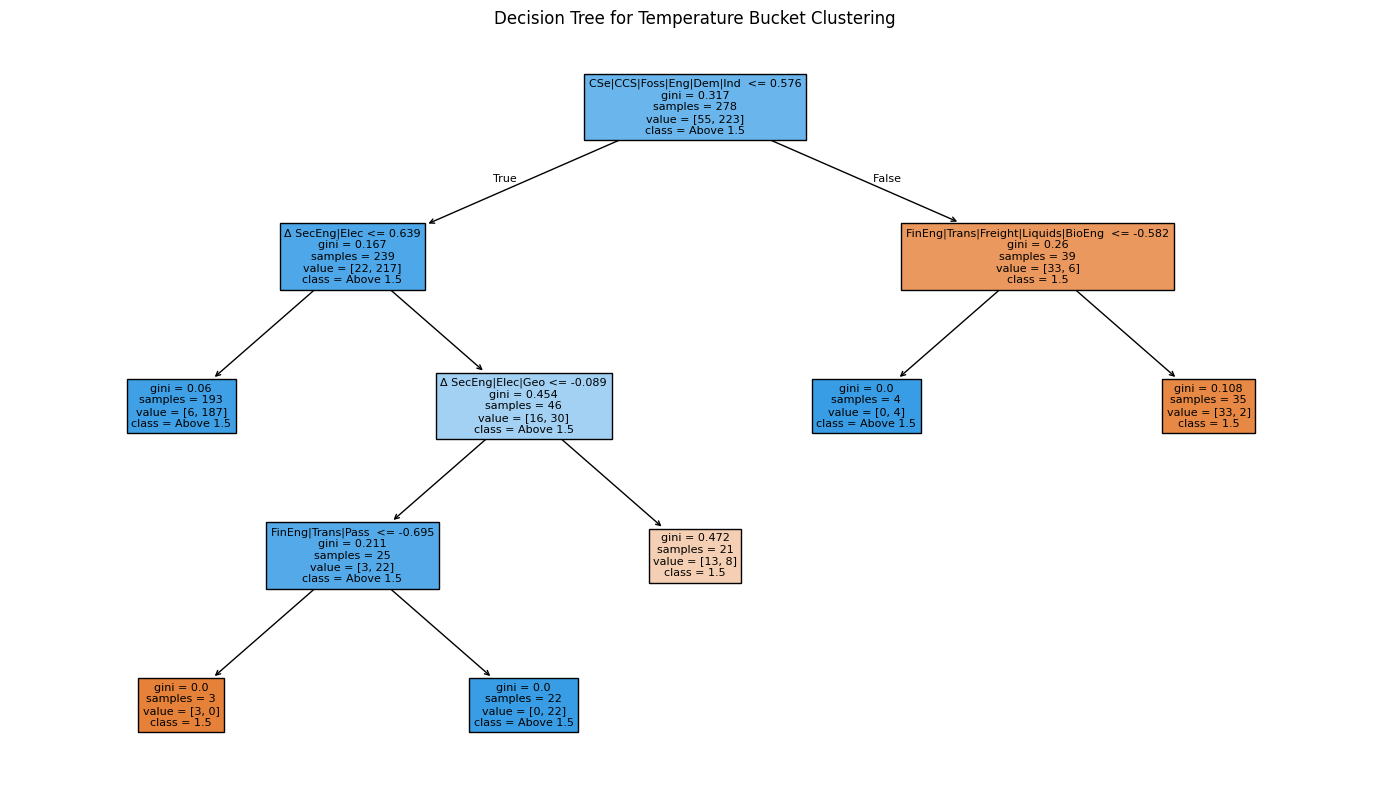

In [187]:
pu.plot_decision_tree(tree, X.columns, le.classes_)

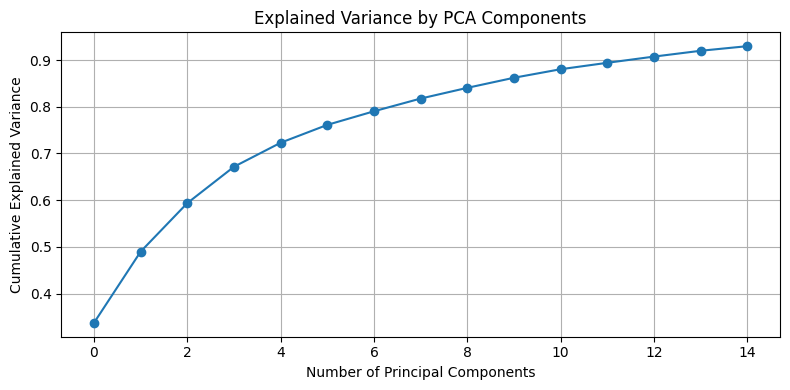

In [188]:
# 5. Predict clusters and apply PCA
tree_labels = tree.predict(X_scaled)
X_pca = pu.apply_pca(X_scaled)


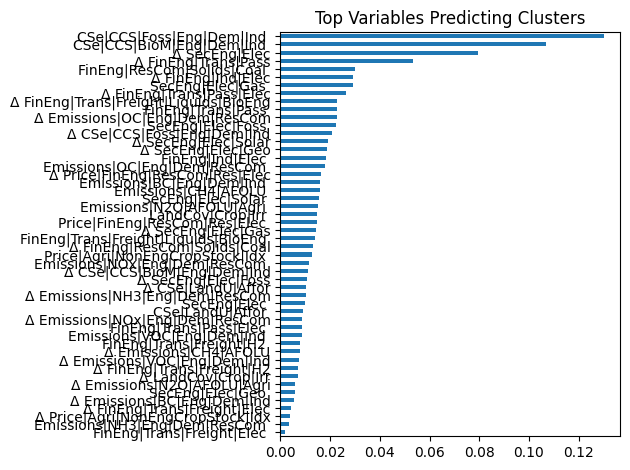

In [189]:
top_importances = pu.perform_rf(X_scaled_df, tree_labels)

In [190]:
df_clustered = df.copy()
df_clustered = df_clustered.drop(columns=['y'])
df_clustered['cluster'] = tree_labels

cluster_profiles = df_clustered.groupby('cluster').mean(numeric_only=True).T
cluster_profiles.head(10)  

cluster                                0            1
Δ SecEng|Elec|Solar             9.544937     6.486908
SecEng|Elec|Solar               4.013603     2.712309
Δ SecEng|Elec                  19.787790    13.006166
SecEng|Elec                    19.023926    19.289099
Δ SecEng|Elec|Foss            -16.644357   -13.803491
SecEng|Elec|Foss               22.369858    27.697745
Δ FinEng|Trans|Freight|Elec     1.260921     0.553872
FinEng|Trans|Freight|Elec       0.276146     0.125191
Δ FinEng|Trans|Pass          1291.030049  1830.130103
FinEng|Trans|Pass             510.225054   798.269300

In [191]:
cluster_to_bucket = {
    0: "1.5°C",
    1: "Above 1.5"
}

#rename cluster_profiles columns to be the cluster_to_bucket values
cluster_profiles.rename(columns=cluster_to_bucket, inplace=True)

cluster_profiles_15 = cluster_profiles.loc[:, "1.5°C"]
cluster_profiles_20 = cluster_profiles.loc[:, "Above 1.5"]

# Create a DataFrame for the cluster profiles
cluster_profiles_15 = pd.DataFrame(cluster_profiles_15)
cluster_profiles_20 = pd.DataFrame(cluster_profiles_20)

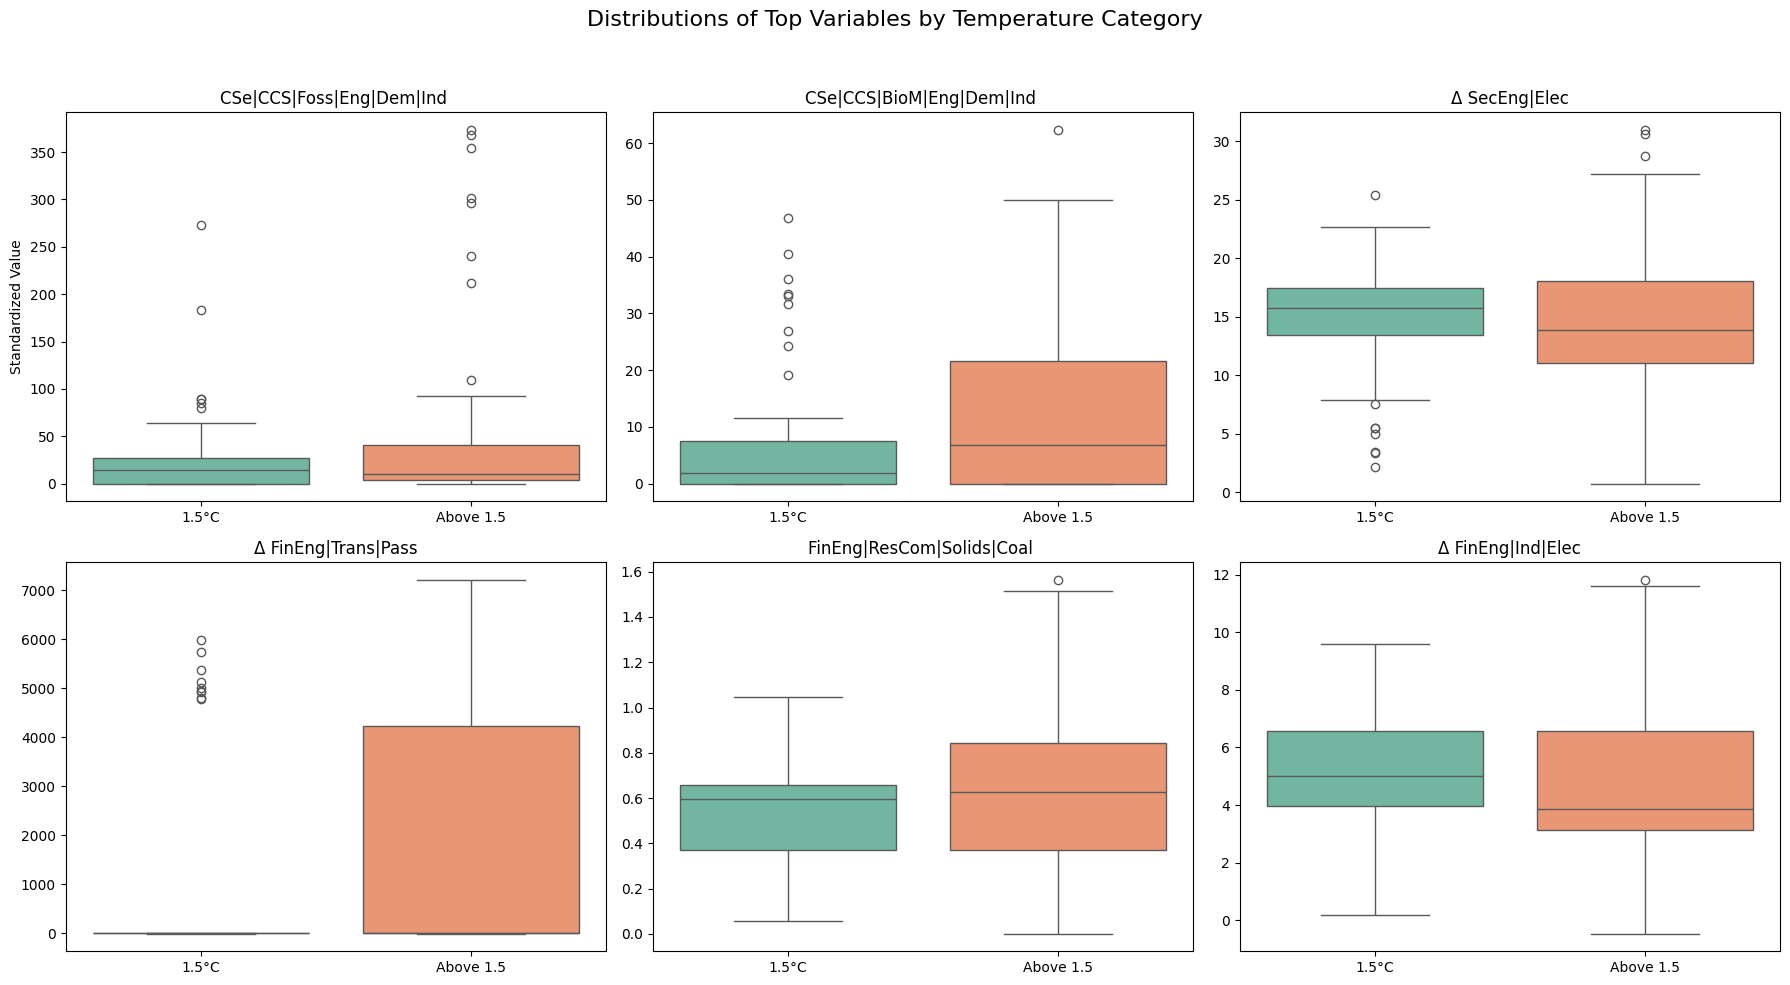

In [192]:
top_vars = top_importances.head(6).index.tolist()
pu.plot_combined_cluster_boxplots(df_clustered, tree_labels, top_vars)

In [193]:
cluster_profiles_15 = cluster_profiles_15.rename(
    columns={"1.5°C": "Random Forest Importance"}
)
combined_sorted = combined_sorted.merge(cluster_profiles_15, left_on='Variable', right_index=True, how='outer')

In [194]:
combined_sorted.rename(columns={0: 'Random Forest Importance'}, inplace=True)

In [195]:
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
df_pca["Cluster"] = tree_labels 

In [196]:
df_pca['temp_bucket'] = y.reset_index(drop=True)

/Users/georgiaray_ic/Documents/coding/PRIM/attempt_2/prim_utils.py:705: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


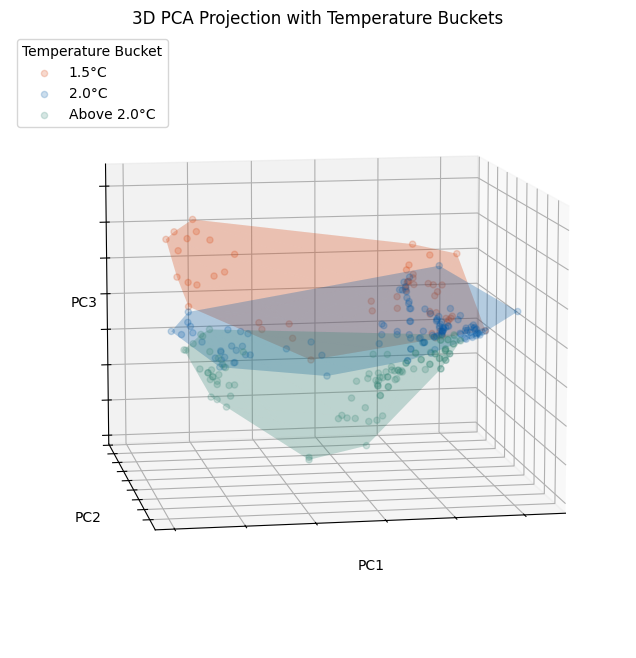

In [197]:
pu.threed_projection(df_pca, X_pca)

____

In [198]:
top_prim = set(combined_sorted.nsmallest(10, 'Box Range Width')['Variable'])
top_shap = set(combined_sorted.nlargest(10, 'SHAP Importance')['Variable'])

# Top 10 from Logistic Regression (largest absolute coefficients)
combined_sorted['abs_logreg'] = combined_sorted['LogReg Coef'].abs()
top_logreg = set(combined_sorted.nlargest(10, 'abs_logreg')['Variable'])

top_rf = set(combined_sorted.nlargest(10, 'Random Forest Importance')['Variable'])

In [199]:
sim_1 = round(pu.jaccard_similarity(top_prim, top_shap),2)
sim_2 = round(pu.jaccard_similarity(top_prim, top_logreg), 2)
sim_3 = round(pu.jaccard_similarity(top_shap, top_logreg), 2)
sim_4 = round(pu.jaccard_similarity(top_prim, top_rf), 2) 
sim_5 = round(pu.jaccard_similarity(top_shap, top_rf), 2)
sim_6 = round(pu.jaccard_similarity(top_logreg, top_rf), 2)
total_sim = round((sim_1 + sim_2 + sim_3 + sim_4 + sim_5 + sim_6)/6, 2)
print('Sims 1:6: ', sim_1, sim_2, sim_3, sim_4, sim_5, sim_6, 'sim_total: ', total_sim)

Sims 1:6:  0.18 0.18 0.33 0.18 0.18 0.11 sim_total:  0.19


____

# Overall Importance

In [200]:
#add a column for sector to the combined_sorted dataframe
combined_sorted['Sector'] = combined_sorted['Variable'].apply(lambda x: pu.assign_sector(x, pu.sector_keywords))

In [201]:
combined_sorted 

Variable  Box Range Width  LogReg Coef  \
0               CSe|CCS|BioM|Eng|Dem|Ind          2.890086    -0.525191   
1               CSe|CCS|Foss|Eng|Dem|Ind          1.152563    -0.820314   
2                        CSe|LandU|Affor               inf    -0.528548   
3               Emissions|BC|Eng|Dem|Ind               inf     0.374751   
4                    Emissions|CH4|AFOLU               inf     0.123448   
5               Emissions|N2O|AFOLU|Agri               inf    -0.367463   
6           Emissions|NH3|Eng|Dem|ResCom               inf     0.469002   
7           Emissions|NOx|Eng|Dem|ResCom               inf     1.211039   
8            Emissions|OC|Eng|Dem|ResCom               inf    -0.106609   
9              Emissions|VOC|Eng|Dem|Ind               inf     0.336258   
10                       FinEng|Ind|Elec               inf     0.574322   
11             FinEng|ResCom|Solids|Coal          4.556965     0.720376   
12             FinEng|Trans|Freight|Elec               inf    -0.073481   
13               FinEng|Trans|Freight|H2               inf    -0.842679   
14   FinEng|Trans|Freight|Liquids|BioEng               inf     0.200244   
15                     FinEng|Trans|Pass               inf     0.141560   
16                FinEng|Trans|Pass|Elec               inf     0.023017   
17                      LandCov|Crop|Irr               inf    -0.718771   
18        Price|Agri|NonEngCropStock|Idx               inf    -0.222578   
19          Price|FinEng|ResCom|Res|Elec               inf    -0.556837   
20                           SecEng|Elec          2.006588     0.116484   
21                      SecEng|Elec|Foss               inf     0.433805   
22                       SecEng|Elec|Gas               inf     1.498075   
23                       SecEng|Elec|Geo               inf     0.089541   
24                     SecEng|Elec|Solar               inf     0.061002   
25             Δ CSe|CCS|BioM|Eng|Dem|Ind              inf    -1.160381   
26             Δ CSe|CCS|Foss|Eng|Dem|Ind              inf     0.048266   
27                      Δ CSe|LandU|Affor              inf    -0.198074   
28             Δ Emissions|BC|Eng|Dem|Ind              inf     0.027195   
29                  Δ Emissions|CH4|AFOLU              inf     1.109202   
30             Δ Emissions|N2O|AFOLU|Agri              inf     0.792586   
31         Δ Emissions|NH3|Eng|Dem|ResCom              inf    -0.202729   
32         Δ Emissions|NOx|Eng|Dem|ResCom              inf     0.745282   
33          Δ Emissions|OC|Eng|Dem|ResCom              inf    -0.082627   
34            Δ Emissions|VOC|Eng|Dem|Ind              inf     0.513847   
35                      Δ FinEng|Ind|Elec              inf    -0.455156   
36            Δ FinEng|ResCom|Solids|Coal              inf     0.139744   
37            Δ FinEng|Trans|Freight|Elec              inf    -0.026253   
38              Δ FinEng|Trans|Freight|H2              inf    -0.202728   
39  Δ FinEng|Trans|Freight|Liquids|BioEng         1.603511    -1.180234   
40                    Δ FinEng|Trans|Pass         2.522625     0.174929   
41               Δ FinEng|Trans|Pass|Elec              inf    -0.158729   
42                     Δ LandCov|Crop|Irr              inf    -0.391899   
43       Δ Price|Agri|NonEngCropStock|Idx              inf     0.170757   
44         Δ Price|FinEng|ResCom|Res|Elec              inf    -0.195493   
45                          Δ SecEng|Elec              inf    -0.528415   
46                     Δ SecEng|Elec|Foss         4.044259     0.201996   
47                      Δ SecEng|Elec|Gas              inf     0.327781   
48                      Δ SecEng|Elec|Geo              inf    -0.086561   
49                    Δ SecEng|Elec|Solar              inf    -0.108240   

    SHAP Importance  Random Forest Importance  abs_logreg       Sector  
0          0.000000                 28.432663    0.525191     Industry  
1          1.462875                 85.955189    0.820314    

In [202]:
importance_cols = [
    "Box Range Width", 
    "abs_logreg", 
    "SHAP Importance", 
    "Random Forest Importance", 
    "LogReg Coef"
]

In [203]:
norm_df = pu.create_norm_df(combined_sorted, importance_cols)

In [204]:
norm_df.sort_values('Average Score', ascending=False, inplace=True)

In [205]:
sector_renames = {
    "Buildings": "Residential & Commercial Buildings",
    "Agriculture": "AFOLU"
}

In [206]:
norm_df['Sector'] = norm_df['Sector'].replace(sector_renames)

In [207]:
norm_df

Box Importance (norm)  \
Variable                                                       
CSe|CCS|Foss|Eng|Dem|Ind                            1.000000   
Δ FinEng|Trans|Freight|Liquids|BioEng               0.718775   
Emissions|NOx|Eng|Dem|ResCom                        0.000000   
Δ CSe|CCS|BioM|Eng|Dem|Ind                          0.000000   
SecEng|Elec|Gas                                     0.000000   
Δ FinEng|Trans|Freight|H2                           0.000000   
Δ FinEng|Trans|Pass                                 0.456891   
Δ Emissions|CH4|AFOLU                               0.000000   
FinEng|ResCom|Solids|Coal                           0.252924   
Δ Emissions|N2O|AFOLU|Agri                          0.000000   
CSe|CCS|BioM|Eng|Dem|Ind                            0.398799   
SecEng|Elec                                         0.574390   
Δ Emissions|NOx|Eng|Dem|ResCom                      0.000000   
FinEng|Trans|Freight|H2                             0.000000   
Δ SecEng|Elec                                       0.000000   
LandCov|Crop|Irr                                    0.000000   
Emissions|N2O|AFOLU|Agri                            0.000000   
Δ Emissions|VOC|Eng|Dem|Ind                         0.000000   
Δ Price|Agri|NonEngCropStock|Idx                    0.000000   
Δ SecEng|Elec|Foss                                  0.284988   
FinEng|Ind|Elec                                     0.000000   
Emissions|NH3|Eng|Dem|ResCom                        0.000000   
SecEng|Elec|Foss                                    0.000000   
CSe|LandU|Affor                                     0.000000   
Price|FinEng|ResCom|Res|Elec                        0.000000   
Δ SecEng|Elec|Solar                                 0.000000   
Δ FinEng|Trans|Freight|Elec                         0.000000   
Δ SecEng|Elec|Geo                                   0.000000   
Δ FinEng|Ind|Elec                                   0.000000   
Δ LandCov|Crop|Irr                                  0.000000   
Δ CSe|LandU|Affor                                   0.000000   
Δ FinEng|Trans|Pass|Elec                            0.000000   
Price|Agri|NonEngCropStock|Idx                      0.000000   
Emissions|BC|Eng|Dem|Ind                            0.000000   
Δ SecEng|Elec|Gas                                   0.000000   
Emissions|VOC|Eng|Dem|Ind                           0.000000   
FinEng|Trans|Freight|Liquids|BioEng                 0.000000   
Emissions|CH4|AFOLU                                 0.000000   
FinEng|Trans|Pass                                   0.000000   
Δ Price|FinEng|ResCom|Res|Elec                      0.000000   
Δ CSe|CCS|Foss|Eng|Dem|Ind                          0.000000   
Δ Emissions|NH3|Eng|Dem|ResCom                      0.000000   
Δ FinEng|ResCom|Solids|Coal                         0.000000   
SecEng|Elec|Solar                                   0.000000   
FinEng|Trans|Freight|Elec                           0.000000   
SecEng|Elec|Geo                                     0.000000   
Emissions|OC|Eng|Dem|ResCom                         0.000000   
Δ Emissions|BC|Eng|Dem|Ind                          0.000000   
Δ Emissions|OC|Eng|Dem|ResCom                       0.000000   
FinEng|Trans|Pass|Elec                              0.000000   

                                       abs_logreg (norm)  \
Variable                                                   
CSe|CCS|Foss|Eng|Dem|Ind                        0.540519   
Δ FinEng|Trans|Freight|Liquids|BioEng           0.784523   
Emissions|NOx|Eng|Dem|ResCom                    0.805407   
Δ CSe|CCS|BioM|Eng|Dem|Ind                      0.771064   
SecEng|Elec|Gas                                 1.000000   
Δ FinEng|Trans|Freight|H2                       0.121834   
Δ FinEng|Trans|Pass                             0.102987   
Δ Emissions|CH4|AFOLU                           0.736367   
FinEng|ResCom|Solids|Coal                       0.472767   
Δ Emissions|N2O|AFOLU|Agri                      0.

____

# Plotting

In [208]:
sector_avg = norm_df.groupby('Sector')[
    [col for col in norm_df.columns if col.endswith('(norm)') or col == 'Average Score']].mean().reset_index()
sector_avg_sorted = sector_avg.sort_values('Average Score', ascending=False).reset_index()

/var/folders/br/4mkn2pts7yg8xb1_dfd6g01c0000gn/T/ipykernel_17469/2332944195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_avg_sorted, x='Average Score', y='Sector', palette='viridis')


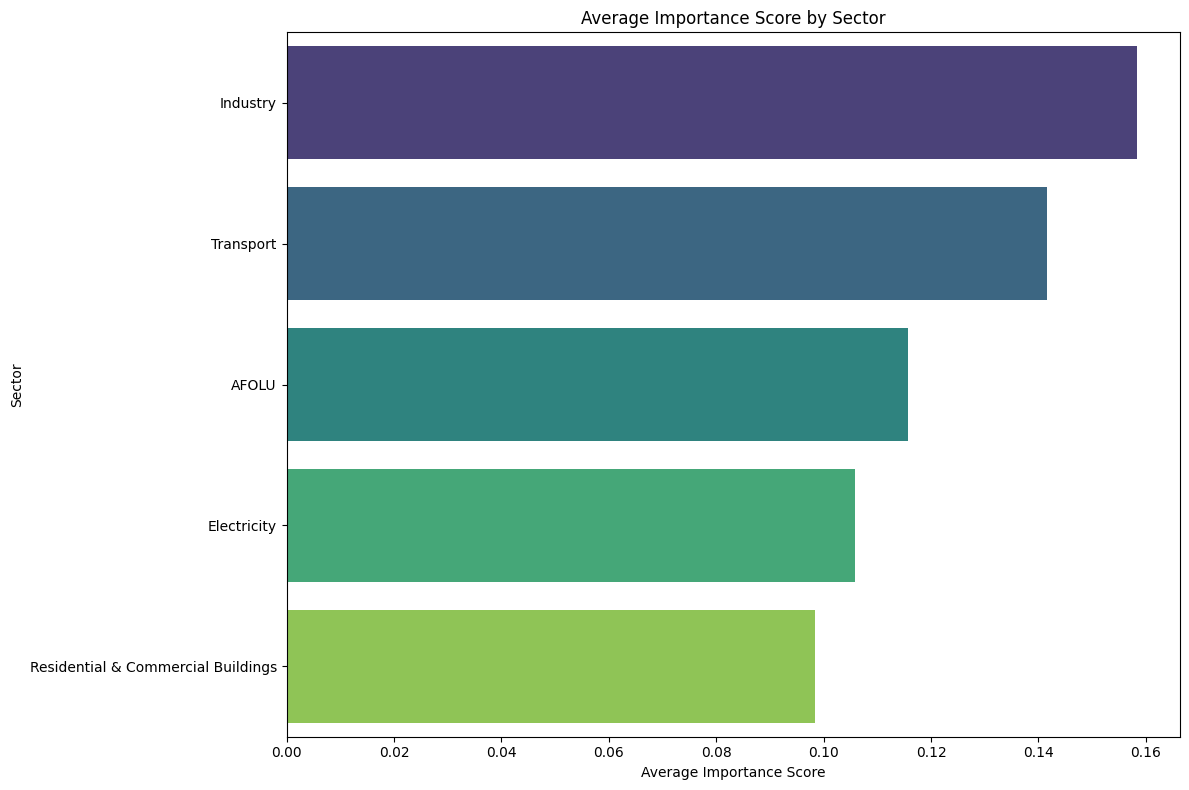

In [209]:
#plot all the sectors in norm df by average score
plt.figure(figsize=(12, 8))
sns.barplot(data=sector_avg_sorted, x='Average Score', y='Sector', palette='viridis')
plt.title('Average Importance Score by Sector')
plt.xlabel('Average Importance Score')
plt.ylabel('Sector')
plt.tight_layout()

___

In [239]:
#Across runs 
sector_rankings = pd.DataFrame({
    'Run 1': ['Industry', 'Transport', 'AFOLU', 'Electricity', 'Residential & Commercial Buildings'],
    'Run 2': ['Transport', 'Residential & Commercial Buildings', 'Electricity', 'Industry', 'AFOLU'],
    'Run 3': ['Electricity', 'AFOLU', 'Industry', 'Residential & Commercial Buildings', 'Transport'],
    'Run 4': ['Residential & Commercial Buildings', 'AFOLU', 'Industry', 'Electricity', 'Transport'],
    'Run 5': ['AFOLU', 'Industry', 'Electricity', 'Transport', 'Residential & Commercial Buildings'],
    'Run 6': ['Electricity', 'Industry', 'Residential & Commercial Buildings', 'AFOLU', 'Transport'],
    'Run 7': ['Industry', 'Residential & Commercial Buildings', 'Electricity', 'Transport', 'AFOLU'],
    'Run 8': ['Industry', 'Transport', 'AFOLU', 'Residential & Commercial Buildings', 'Electricity'],
    'Run 9': ['AFOLU', 'Transport', 'Residential & Commercial Buildings', 'Industry', 'Electricity'],
    'Run 10': ['Electricity', 'Transport', 'AFOLU', 'Residential & Commercial Buildings', 'Industry']
})

selected_sector_rankings = pd.DataFrame({
    'Run 1': ['Industry', 'Transport', 'AFOLU', 'Electricity', 'Residential & Commercial Buildings'],
    'Run 3': ['Electricity', 'AFOLU', 'Industry', 'Residential & Commercial Buildings', 'Transport'],
    'Run 6': ['Electricity', 'Industry', 'Residential & Commercial Buildings', 'AFOLU', 'Transport'],
    'Run 8': ['Industry', 'Transport', 'AFOLU', 'Residential & Commercial Buildings', 'Electricity'],
    'Run 10': ['Electricity', 'Transport', 'AFOLU', 'Residential & Commercial Buildings', 'Industry']
})

# Transform into ranking table (index: sector, columns: run, values: rank)
ranking_table = selected_sector_rankings.apply(lambda col: pd.Series(col.index, index=col.values)).T
ranking_table = ranking_table.astype(int) + 1 
ranking_table = pd.DataFrame(ranking_table)

In [240]:
ranking_table

AFOLU  Electricity  Industry  Residential & Commercial Buildings  \
Run 1       3            4         1                                   5   
Run 3       2            1         3                                   4   
Run 6       4            1         2                                   3   
Run 8       3            5         1                                   4   
Run 10      3            1         5                                   4   

        Transport  
Run 1           2  
Run 3           5  
Run 6           5  
Run 8           2  
Run 10          2

In [241]:
#Add total row 
ranking_table.loc['mean'] = ranking_table.sum()/ranking_table.shape[0]
ranking_table.loc['Total'] = ranking_table.sum()

In [242]:
ranking_table

AFOLU  Electricity  Industry  Residential & Commercial Buildings  \
Run 1     3.0          4.0       1.0                                 5.0   
Run 3     2.0          1.0       3.0                                 4.0   
Run 6     4.0          1.0       2.0                                 3.0   
Run 8     3.0          5.0       1.0                                 4.0   
Run 10    3.0          1.0       5.0                                 4.0   
mean      3.0          2.4       2.4                                 4.0   
Total    18.0         14.4      14.4                                24.0   

        Transport  
Run 1         2.0  
Run 3         5.0  
Run 6         5.0  
Run 8         2.0  
Run 10        2.0  
mean          3.2  
Total        19.2

In [243]:
df_ranks = ranking_table.copy()
#drop the total row
df_ranks = df_ranks.drop(index='Total')

In [244]:
sectors = ['Industry', 'AFOLU', 'Electricity', 'Transport', 'Residential & Commercial Buildings']
color_dict = {
    'Industry': '#66c2a5',
    'AFOLU': '#fc8d62',
    'Electricity': '#8da0cb',
    'Transport': '#e78ac3',
    'Residential & Commercial Buildings': '#a6d854'
}

/var/folders/br/4mkn2pts7yg8xb1_dfd6g01c0000gn/T/ipykernel_17469/3370154639.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_long, x='Sector', y='Rank', order=sector_order, palette=color_dict)
/var/folders/br/4mkn2pts7yg8xb1_dfd6g01c0000gn/T/ipykernel_17469/3370154639.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label_mapping[sector] for sector in sector_order])


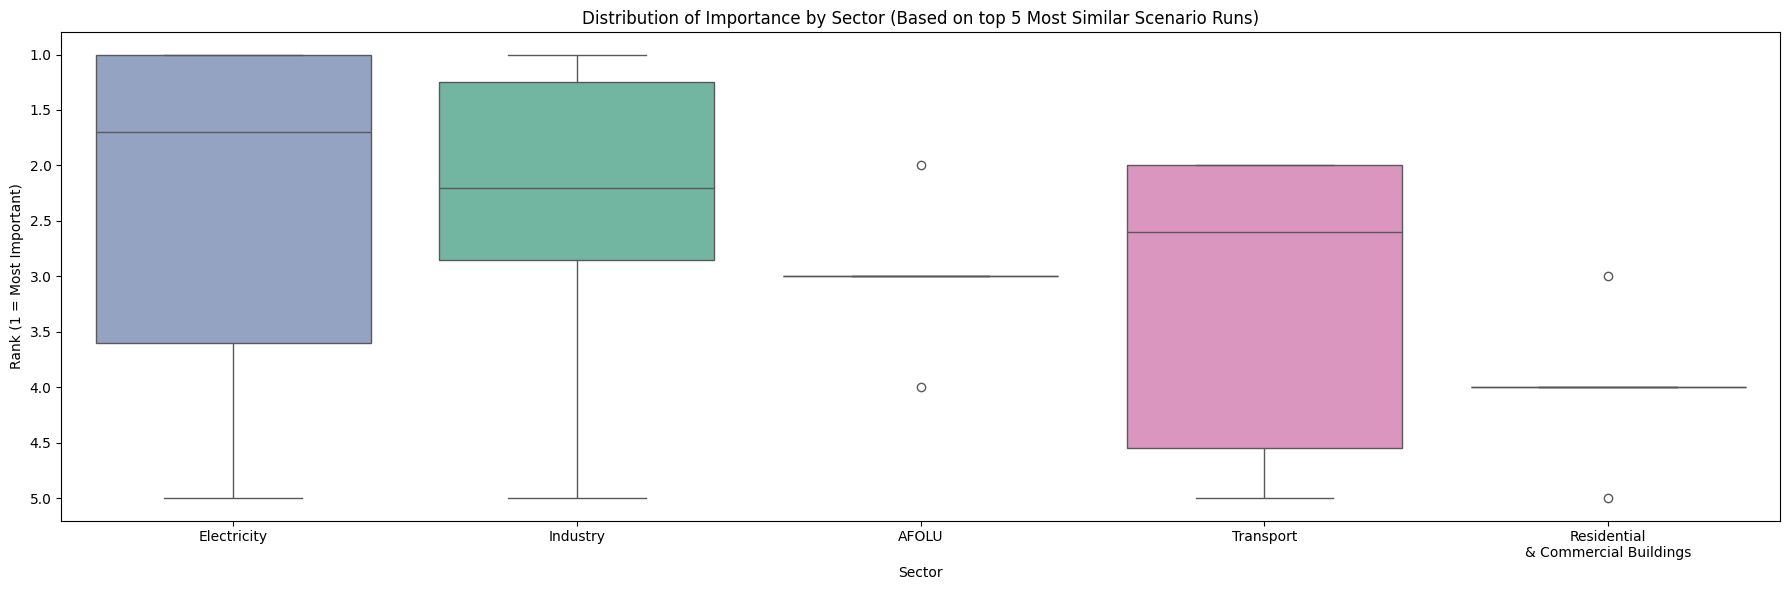

In [249]:
df_long = df_ranks.melt(var_name='Sector', value_name='Rank')

# 2. Get the sector order by mean rank
sector_order = df_long.groupby('Sector')['Rank'].mean().sort_values().index.tolist()

# 3. Fixed color mapping
color_dict = {
    'Industry': '#66c2a5',
    'AFOLU': '#fc8d62',
    'Electricity': '#8da0cb',
    'Transport': '#e78ac3',
    'Residential & Commercial Buildings': '#a6d854'
}

label_mapping = {
    'Industry': 'Industry',
    'AFOLU': 'AFOLU',
    'Electricity': 'Electricity',
    'Transport': 'Transport',
    'Residential & Commercial Buildings': 'Residential\n& Commercial Buildings'
}

# Apply the label mapping to the x-axis tick labels after plotting
plt.figure(figsize=(18, 6))
ax = sns.boxplot(data=df_long, x='Sector', y='Rank', order=sector_order, palette=color_dict)
plt.gca().invert_yaxis()
plt.title("Distribution of Importance by Sector (Based on top 5 Most Similar Scenario Runs)")
plt.ylabel("Rank (1 = Most Important)")
plt.xlabel("Sector")

# Update x-axis tick labels with wrapped names
ax.set_xticklabels([label_mapping[sector] for sector in sector_order])

plt.tight_layout()
plt.show()


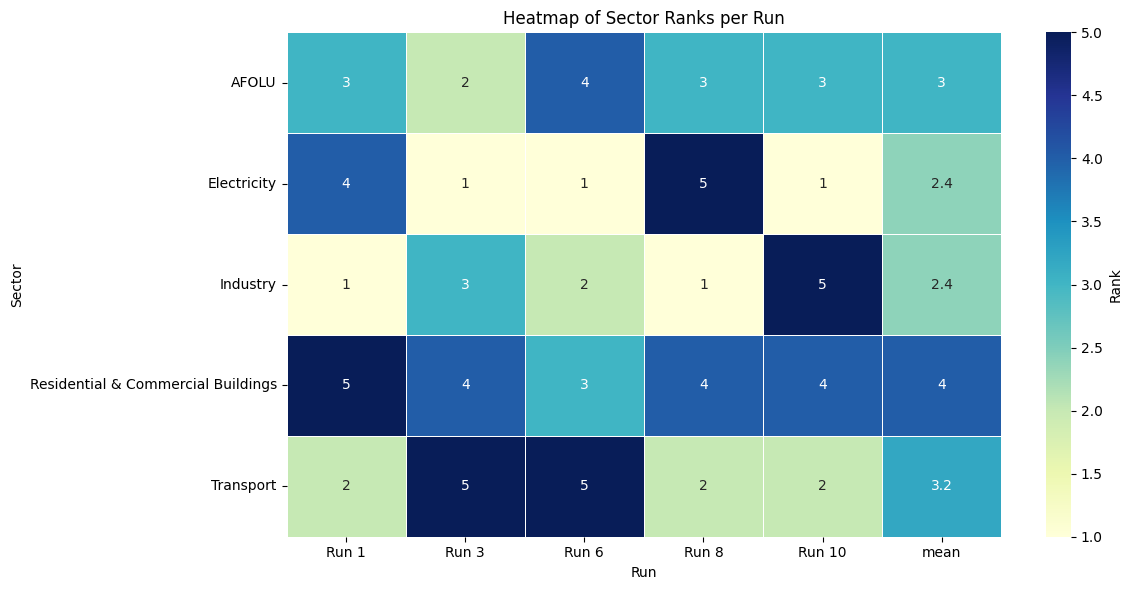

In [246]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_ranks.T, annot=True, cmap="YlGnBu", cbar_kws={"label": "Rank"}, linewidths=0.5)
plt.title("Heatmap of Sector Ranks per Run")
plt.xlabel("Run")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


In [247]:
run10_data = [
    {"Run": "Run 10", "Variable": "Cumulative Capacity|Elec|BioM|w|CCS", "Restricted Range": "[-0.6523, 2.6713]", "Full Range": "[-0.6523, 2.9113]"},
    {"Run": "Run 10", "Variable": "Δ Cumulative Capacity|Elec|Gas|w|CCS", "Restricted Range": "[-0.5019, 1.0314]", "Full Range": "[-0.5019, 4.1081]"},
    {"Run": "Run 10", "Variable": "Δ Water Consumption|Elec|Dry Cooling", "Restricted Range": "[-1.9091, 1.2683]", "Full Range": "[-2.4471, 1.2683]"},
]

run6_data = [
    {"Run": "Run 6", "Variable": "Δ Investment|Eng Supply|Elec|BioM|w o CCS", "Restricted Range": "[-0.4061, 10.4774]", "Full Range": "[-0.5222, 10.4774]"},
    {"Run": "Run 6", "Variable": "FinEng|Ind|Liquids", "Restricted Range": "[-0.8591, 3.5059]", "Full Range": "[-1.0701, 3.5059]"},
    {"Run": "Run 6", "Variable": "Capacity|Elec|BioM", "Restricted Range": "[-2.7145, 1.5371]", "Full Range": "[-2.7145, 1.8675]"},
    {"Run": "Run 6", "Variable": "Emissions|CH4|Eng|Dem|Ind", "Restricted Range": "[-0.6738, 9.5788]", "Full Range": "[-1.1574, 9.5788]"},
]

# Combine the data into one DataFrame
prim_box_df = pd.DataFrame(run10_data + run6_data)

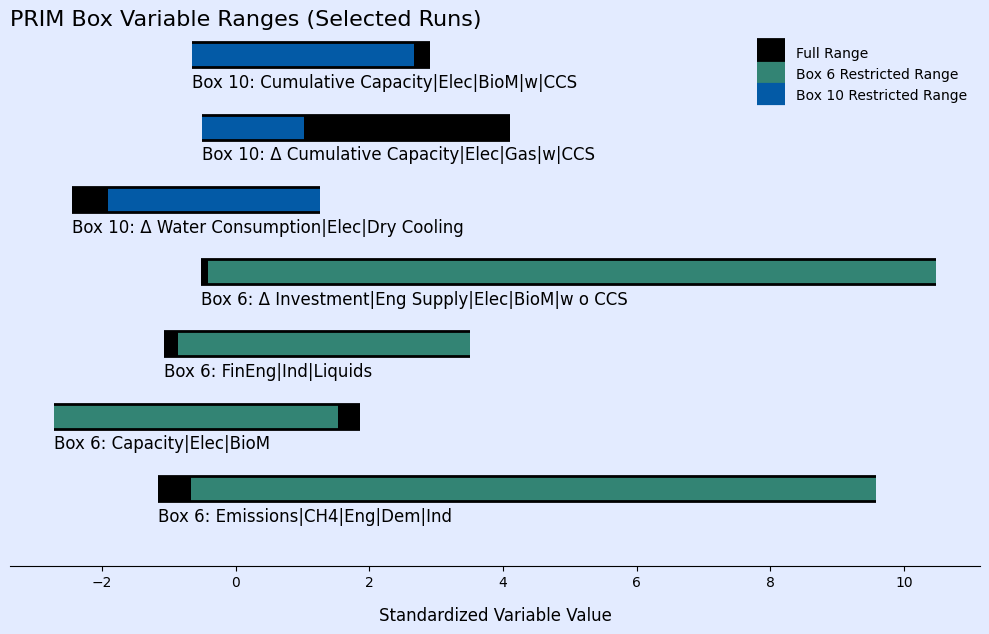

In [254]:
# Prepare Run 10 and Run 6 data separately
run10_df = prim_box_df[prim_box_df['Run'] == 'Run 10'].copy()
run6_df = prim_box_df[prim_box_df['Run'] == 'Run 6'].copy()

# Combine and assign colors
run10_df["Color"] = "#035AA6"  # Blue
run6_df["Color"] = "#338474"  # Teal

combined_df = pd.concat([run10_df, run6_df], ignore_index=True)

# Assign group labels
combined_df["Group"] = combined_df["Run"].str.replace("Run ", "Box ")

# Reverse order for plotting
combined_df = combined_df.iloc[::-1].reset_index(drop=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 0.75 * len(combined_df)))

for i, row in combined_df.iterrows():
    full_range = eval(row["Full Range"])
    restricted_range = eval(row["Restricted Range"])

    # Plot full range
    ax.hlines(i, *full_range, color='black', linewidth=20, 
          label='Full Range' if i == 0 else "")
    # Plot restricted range
    ax.hlines(i, *restricted_range, color=row["Color"], linewidth=16, 
          label=f'{row["Group"]} Restricted Range' if i == 0 or row["Run"] != combined_df.iloc[i-1]["Run"] else "")
    # Annotate variable name *below* the bar
    ax.text(full_range[0], i - 0.25, f"{row['Group']}: {row['Variable']}", 
            va='top', ha='left', fontsize=12)

fig.patch.set_facecolor('#e3ebff')     # Sets the figure (outer) background
ax.set_facecolor('#e3ebff')  # Sets the axes (inner) background
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_position(('outward', 40))
ax.legend(frameon=False, loc='upper right')
ax.set_xlabel("Standardized Variable Value", fontsize=12)
ax.set_title("PRIM Box Variable Ranges (Selected Runs)", loc='left', fontsize=16)
ax.xaxis.set_label_coords(0.5, -0.2) 
plt.tight_layout(rect=[0, 0, 1, 1.2])
plt.show()